# Project 3: Web APIs & Classification

## Executive Summary

With reddit's high popularity in the United States (U.S.), this project that deals with web APIs, Natural Language Processing (NLP) and Classification has been initiated by established smartphone brand LG for their own marketing (and product development) purposes. With the aim of improving the brand's market share in the U.S. smartphone industry, we are tasked to work with Reddit's API to scrape and store user posts from two subreddits, /r/Apple and /r/Android, and eventually train a classifier model that can accurately predict a post's subreddit origin and help gain insights on popular and important words from each subreddit.

An appropriate classification model (TfidfVectorized Multinomial Naive Bayes) for the prediction of subreddit origin was chosen after comparing largely based on their accuracy scores (with further comparison done based on its recall and specificity rates, and eventually with its RUC-AOC score). Finally, we studied and interpreted the classification model, checking for important words from each subreddit that can definitively indicate the subreddit origin of a post.

Through exploratory data analysis and the study of each subreddit's most important words, it appears that highly popular words from each subreddit are usually product-related or feature-related. However, initial exploratory data analysis also included some highly-ranked emotionally-driven words while analysis of important words after modelling showed otherwise. This lack of emotionally-driven words does correspond to our sentiment analysis that we have done after studying the polarity of words and its frequency distribution from both subreddits, in which the nature of both subreddits lean more towads neutral sentiments.

This is followed by recommendations for increasing LG's market share in the U.S. smartphone industry:

- Continue to invest and engage in more R&D to develop smartphones that can solve the painpoints of customers 

- Slightly tweaking the direction of their marketing campaigns to highlight how their products can help to solve many current pain points of their target consumers.

- Engage in influencer marketing due to the high popularity of smartphone reviews 

- Improve and maintain good quality in-store and support experience

- Expand the LG forum page to not only include US and Canada regions, but also worldwide to facilitate more discussions on these forums.

Moving forward, the model can be trained with more new text data from both subreddits repeatedly, so that the model can continuously calibrate and improve its accuracy overtime. Besides that, LG can also choose to invest in more market research to learn more about their target consumers outside of reddit, since subreddit users are only a proportion of LG's target consumers in the United States. In addition, videos or news articles linked in the subreddit posts can also include valuable information regarding their target consumers and should be studied too in the future.

### Contents:
- [Executive Summary](#Executive-Summary)
- [Problem Statement](#Problem-Statement)
- [Data Collection](#Data-Collection)
- [Data Cleaning](#Data-Cleaning)
- [Some Preprocessing with Exploratory Data Analysis](#Some-Preprocessing-with-Exploratory-Data-Analysis)
- [Distributions](#Distributions)
- [Modelling](#Modelling)
- [Selection and Evaluation of Model](#Selection-and-Evaluation-of-Model)
- [Our Final Model](#Our-Final-Model)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)
- [References](#References)

## Problem Statement

Due to reddit's high popularity among smartphone users in the United States (U.S.)<sup>[[1]](https://foundationinc.co/lab/reddit-statistics/#:~:text=Reddit%20is%20the%20Sixth%20Most,website%20in%20the%20United%20States.)</sup>, we have been hired by LG to analyse posts from two subreddits (LG's mobile OS, <b>/r/Android</b>, and its direct competitor, <b>/r/Apple</b>) and get insights on how to improve their marketing efforts and their products so as to increase their market share in the U.S. smartphone industry. Working with Reddit's API to scrape and store user posts between these two subreddits, we will make use of Natural Language Processing to analyse, understand and derive information from text data before training a subreddit post classifier through the selection of an appropriate classification model. This will in turn allow us to classify and predict which subreddit a given post come from. To choose our final classification model, we will be comparing the models' accuracy scores (and specificity and recall rates if there are two or more models that performed similarly in accuracy).

Ultimately, we aim to provide a model that can accurately predict a post's subreddit origin, highlighting not only the most popular words but also the most indicative words (which suggests the subreddit origin of a post) in each subreddit. Through the model, we can analyse, gain useful insights and provide powerful recommendations for LG in their marketing (and product development) efforts, hence helping the brand continue to grow their market share in the U.S., among the other big players like Apple, Samsung and Google<sup>[[2]](https://marketrealist.com/2019/08/googles-android-will-remain-top-long-time/)</sup> in the smartphone industry.


## Data Collection

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import regex as re
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from textblob import TextBlob, Word

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
#list each url with json
#extracting from the 'this year' top posts on each subreddit
url_apple = 'https://www.reddit.com/r/apple/top/.json?t=year'  
url_android = 'https://www.reddit.com/r/Android/top/.json?t=year'

In [3]:
#create a function to extract posts for each subreddit
def get_posts(url, csv, number):
    posts = []
    after = None

    for a in range(number):
        if after == None:
            current_url = url
        else:
            current_url = url + '&after=' + after
        print(current_url)
        res = requests.get(current_url, headers={'User-agent': 'Pony Inc 1.0'})

        if res.status_code != 200:
            print('Status error', res.status_code)
            break

        current_dict = res.json()
        current_posts = [p['data'] for p in current_dict['data']['children']]
        posts.extend(current_posts)
        after = current_dict['data']['after']

        #generate a random sleep duration to look more 'natural'
        #using time-sleep duration to put random pauses into our requests
        sleep_duration = random.randint(2,10)
        print(sleep_duration)
        time.sleep(sleep_duration)
        
        print(f"No.of posts: {len(posts)}")
        pd.DataFrame(posts).to_csv(csv, index = False)

#### Apple

In [19]:
#extract posts from apple's subreddit, and export to apple.csv
#loop 40 times

#get_posts(url_apple, '../datasets/apple.csv', 40) 
#will make the code above as a comment so as to not execute the code again during re-runs

https://www.reddit.com/r/apple/top/.json?t=year
3
No.of posts: 25
https://www.reddit.com/r/apple/top/.json?t=year&after=t3_hf27pj
10
No.of posts: 50
https://www.reddit.com/r/apple/top/.json?t=year&after=t3_eru34a
6
No.of posts: 75
https://www.reddit.com/r/apple/top/.json?t=year&after=t3_gumrfo
10
No.of posts: 100
https://www.reddit.com/r/apple/top/.json?t=year&after=t3_esukx8
4
No.of posts: 125
https://www.reddit.com/r/apple/top/.json?t=year&after=t3_e3hrdx
2
No.of posts: 150
https://www.reddit.com/r/apple/top/.json?t=year&after=t3_hxoa0q
5
No.of posts: 175
https://www.reddit.com/r/apple/top/.json?t=year&after=t3_dtljsd
10
No.of posts: 200
https://www.reddit.com/r/apple/top/.json?t=year&after=t3_fubib0
4
No.of posts: 225
https://www.reddit.com/r/apple/top/.json?t=year&after=t3_ggq9sg
9
No.of posts: 250
https://www.reddit.com/r/apple/top/.json?t=year&after=t3_e2gw2o
6
No.of posts: 275
https://www.reddit.com/r/apple/top/.json?t=year&after=t3_hrkeho
10
No.of posts: 300
https://www.reddit.

In [4]:
#read in apple.csv
apple = pd.read_csv('../datasets/apple.csv')

#double-check for no. of posts before removing duplicates
len(apple)

999

In [5]:
#drop posts with duplicated titles
#no duplicates exist
apple.drop_duplicates(subset='title', keep='first', inplace=True)
len(apple)

999

#### Android

In [22]:
#extract posts from android's subreddit, and export to android's csv
#loop 45 times

#get_posts(url_android, '../datasets/android.csv', 45)
#will make the code above as a comment so as to not execute the code again during re-runs

https://www.reddit.com/r/Android/top/.json?t=year
10
No.of posts: 25
https://www.reddit.com/r/Android/top/.json?t=year&after=t3_dfwygz
5
No.of posts: 50
https://www.reddit.com/r/Android/top/.json?t=year&after=t3_dscgeg
4
No.of posts: 75
https://www.reddit.com/r/Android/top/.json?t=year&after=t3_fdsaeq
6
No.of posts: 100
https://www.reddit.com/r/Android/top/.json?t=year&after=t3_hhfr8n
9
No.of posts: 125
https://www.reddit.com/r/Android/top/.json?t=year&after=t3_dpkta3
6
No.of posts: 150
https://www.reddit.com/r/Android/top/.json?t=year&after=t3_g1cf7s
5
No.of posts: 175
https://www.reddit.com/r/Android/top/.json?t=year&after=t3_i73hj9
7
No.of posts: 200
https://www.reddit.com/r/Android/top/.json?t=year&after=t3_hx4nv6
5
No.of posts: 225
https://www.reddit.com/r/Android/top/.json?t=year&after=t3_dfmt1r
6
No.of posts: 250
https://www.reddit.com/r/Android/top/.json?t=year&after=t3_fwf1k7
7
No.of posts: 275
https://www.reddit.com/r/Android/top/.json?t=year&after=t3_h7khi2
6
No.of posts: 30

In [6]:
#read in android.csv
android = pd.read_csv('../datasets/android.csv')

#double-check for no. of posts before removing duplicates
len(android)

1100

In [7]:
#drop posts with duplicated titles
#only one duplicate is removed
android.drop_duplicates(subset='title', keep='first', inplace=True)
len(android)

999

## Data Cleaning

In [8]:
#combine both apple and android data together
combined = apple.append(android, ignore_index=True)
combined.head(4)

approved_at_utc subreddit selftext author_fullname  saved  \
0              NaN     apple      NaN        t2_ipjaq  False   
1              NaN     apple      NaN        t2_oa1us  False   
2              NaN     apple      NaN       t2_48kr10  False   
3              NaN     apple      NaN        t2_gbqj9  False   

   mod_reason_title  gilded  clicked  \
0               NaN       0    False   
1               NaN       0    False   
2               NaN       1    False   
3               NaN       0    False   

                                               title  \
0  Fornite has been removed from the App Store af...   
1  Phone Calls Will Finally Stop Taking Up the En...   
2  Epic Games says Apple is terminating their dev...   
3  Larry Tesler, the Apple employee who invented ...   

                  link_flair_richtext  ... num_crossposts  \
0                                  []  ...              6   
1         [{'e': 'text', 't': 'iOS'}]  ...              7   
2  [{'e': 'text', 't': 'Discussion'}]  ...              4   
3                                  []  ...              4   

                                               media  is_video  \
0  {'type': 'twitter.com', 'oembed': {'provider_u...     False   
1                                                NaN     False   
2  {'type': 'twitter.com', 'oembed': {'provider_u...     False   
3                                                NaN     False   

                 link_flair_template_id  author_cakeday  \
0                                   NaN             NaN   
1  e9b1d532-5701-11e9-87f1-0edf28c73d02             NaN   
2  86b258de-5702-11e9-98ce-0eebcac587ec             NaN   
3                                   NaN             NaN   

   crosspost_parent_list  crosspost_parent  event_start event_end  \
0                    NaN               NaN          NaN       NaN   
1                    NaN               NaN          NaN       NaN   
2                    NaN               NaN          NaN       NaN   
3                    NaN               NaN          NaN       NaN   

   event_is_live  
0            NaN  
1            NaN  
2            NaN  
3            NaN  

[4 rows x 114 columns]

In [9]:
#combine all irrelevant columns to dropped_cols
dropped_cols = []
for x in combined.columns:    
    if x not in ['selftext', 'title', 'subreddit']:
        dropped_cols.append(x)

In [10]:
#dropping columns found in dropped_cols 
combined_df = combined.drop(dropped_cols, axis = 1)
combined_df.head(4)

subreddit selftext                                              title
0     apple      NaN  Fornite has been removed from the App Store af...
1     apple      NaN  Phone Calls Will Finally Stop Taking Up the En...
2     apple      NaN  Epic Games says Apple is terminating their dev...
3     apple      NaN  Larry Tesler, the Apple employee who invented ...

In [11]:
#lots of NaN roles because because many users put the text in the titles
combined_df.isnull().sum()

subreddit       0
selftext     1837
title           0
dtype: int64

#### Feature Engineering

Since many users from both subreddits have the habit of either posting videos (which leads to empty selftext but filled titles) or putting the content in the titles only, we will be combining the title and self_text together to form a new column called 'text', which will be used for modelling and analysis.

In [12]:
#Replace null texts with empty string
combined_df.selftext.fillna(value='', inplace=True)

In [13]:
#check for null values
combined_df.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [14]:
#Feature Engineering
#Combine title and selftext, and make it into a new 'text' column
combined_df['text'] = combined_df['title'] + ' ' + combined_df['selftext']
combined_df.head(4)

subreddit selftext                                              title  \
0     apple           Fornite has been removed from the App Store af...   
1     apple           Phone Calls Will Finally Stop Taking Up the En...   
2     apple           Epic Games says Apple is terminating their dev...   
3     apple           Larry Tesler, the Apple employee who invented ...   

                                                text  
0  Fornite has been removed from the App Store af...  
1  Phone Calls Will Finally Stop Taking Up the En...  
2  Epic Games says Apple is terminating their dev...  
3  Larry Tesler, the Apple employee who invented ...

In [15]:
#drop title and selftext columns after making new 'text' column
combined_df.drop(['title', 'selftext'], axis = 1, inplace=True)

In [16]:
#drop any duplicates
combined_df.drop_duplicates(subset='text', keep='first', inplace=True)
combined_df.shape

(1994, 2)

#### Target value

In [17]:
#Our target variable is 'subreddit', with the current values: 'apple', and 'Android'.
#Need to transform to 0 or 1 values. 
#We will set apple = 1, and Android = 0; and placed it under the 'target' column

combined_df['target'] = combined_df['subreddit'].map({'apple': 1, 'Android': 0})
combined_df.drop('subreddit', axis=1, inplace=True)
combined_df.head()

text  target
0  Fornite has been removed from the App Store af...       1
1  Phone Calls Will Finally Stop Taking Up the En...       1
2  Epic Games says Apple is terminating their dev...       1
3  Larry Tesler, the Apple employee who invented ...       1
4  Apple has now terminated Epic's App Store acco...       1

In [18]:
#export to combined_df.csv
combined_df.to_csv('../datasets/combined_df.csv', index=False)

#### Text data cleaning

Besides converting our text to lowercase characters, and removing special entities (such as HTML, hyperlinks) as well as non-letters, we will also be removing any stop words from our text data in this 'text data cleaning' section.

In [19]:
#read in combined_df.csv
combined_df = pd.read_csv('../datasets/combined_df.csv')

In [20]:
#Create function to clean the text from combined_df
def text_to_words(text):

    #Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', ' ', text)
    
    #Remove hyperlinks
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    
    #Remove all subreddit entities (e.g. /r/PickAnAndroidForMe)
    text = re.sub(r'\/r.\w+', '', text)
    
    #Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    #Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    
    #Converts string to lower text and split by space
    words = letters_only.lower().split()
    
    #Convert the stop words to a set. 
    #Using ntlk stop words as the ntlk list is more comprehensive.
    stops = set(stopwords.words('english'))
    
    #Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
    
    #Join the words back into one string separated by space, and return the result.
    return(" ".join(meaningful_words))

In [21]:
#Clean all text from combined_df
cleaned_text = []
total_text = combined_df.shape[0]
j = 0
for text in combined_df[['text']]['text']:
    #Convert review to words, then append to clean_text.
    cleaned_text.append(text_to_words(text))
    
    #If the index is divisible by 1000, print a message
    if (j + 1) % 100 == 0:
        print(f'Review {j + 1} of {total_text}.')
    
    j += 1
print('Review completed.')

Review 100 of 1994.
Review 200 of 1994.
Review 300 of 1994.
Review 400 of 1994.
Review 500 of 1994.
Review 600 of 1994.
Review 700 of 1994.
Review 800 of 1994.
Review 900 of 1994.
Review 1000 of 1994.
Review 1100 of 1994.
Review 1200 of 1994.
Review 1300 of 1994.
Review 1400 of 1994.
Review 1500 of 1994.
Review 1600 of 1994.
Review 1700 of 1994.
Review 1800 of 1994.
Review 1900 of 1994.
Review completed.


In [22]:
#Make new dataframe 'cleaned_text_df' with all cleaned text 
#Cleaned text will be placed under the column 'text'
cleaned_text_df = pd.DataFrame(cleaned_text, columns=['text'])
cleaned_text_df.head(4)

text
0  fornite removed app store implemented direct p...
1  phone calls finally stop taking entire screen ios
2  epic games says apple terminating developer ac...
3  larry tesler apple employee invented cut copy ...

In [23]:
#Add in the target variables for cleaned_text_df (1 is Apple, 0 is Android)
cleaned_text_df['target'] = combined_df['target']
cleaned_text_df.head(4)

text  target
0  fornite removed app store implemented direct p...       1
1  phone calls finally stop taking entire screen ios       1
2  epic games says apple terminating developer ac...       1
3  larry tesler apple employee invented cut copy ...       1

In [24]:
#check for any null values
cleaned_text_df.isnull().sum()

text      0
target    0
dtype: int64

In [25]:
#remove any duplicates
cleaned_text_df.drop_duplicates(subset='text', keep='first', inplace=True)
cleaned_text_df.shape

(1993, 2)

#### Addressing Outliers: Rare Words

I am treating rare words (words that only have 1 word count) as outliers since their word count is drastically distant and different from the word count of other words<sup>[[3]](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/)</sup>. Since these words are rare (and can be considered as noise), these outliers will be removed.

In [26]:
#combining all available words into 'all_words'
all_words = pd.Series(' '.join(cleaned_text_df['text']).split()).value_counts()

In [27]:
#make a list of words from all_words with only one word count
rare_words = list((all_words[all_words==1]).index)

#remove all outliers (rare words with one word count)
cleaned_text_df['text'] = cleaned_text_df['text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in rare_words))
cleaned_text_df.head(4)

text  target
0  fornite removed app store implemented direct p...       1
1  phone calls finally stop taking entire screen ios       1
2  epic games says apple terminating developer ac...       1
3                 apple employee cut copy paste dies       1

## Some Preprocessing with Exploratory Data Analysis

Our preprocessing methods includes removing stopwords (which was done in the earlier section under [Text data cleaning](#Text-data-cleaning)), and lemmatizating or stemming words. A text preprocessing method will be chosen between Lemmatization and PorterStemmer.

This will be followed by CountVectorization, coupled with some exploratory data analysis after CountVectorization is done to our text data. Even though not found in this section, TfidfVectorization will be also executed as part of a pipeline in the modelling section.

### Wordclouds

Let's plot some wordclouds to take a peek at some of the most highly-ranked and popular words from each subreddit after executing Lemmatization and PorterStemmer respectively. We will also be choosing a suitable text preprocessing method between Lemmatization and PorterStemmer moving forward.

For wordcloud-plotting purposes, we will tokenize, lemmatize/stem and then combine all words into a string before plotting them. The data from cleaned_text_df will not be touched or cleaned at this stage.

In [28]:
#create function that plots wordclouds visualising popular words for each subreddit
def show_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='white',
        max_words=1000,
        colormap='brg',
        random_state=22,
        collocations=False,
        scale=3).generate(data)
    fig = plt.figure(1, figsize=(12, 12))
    plt.imshow(wordcloud, interpolation="bilinear")
    if title:
        plt.title(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.axis('off')
    
    plt.imshow(wordcloud)
    plt.show()

#### Tokenisation

In [29]:
#Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

#Tokenize them
#Combine all words found from apple subreddit
apple_words = tokenizer.tokenize(str(list(cleaned_text_df[cleaned_text_df['target']==1]['text'])))

#Combine all words found from android subreddit
android_words = tokenizer.tokenize(str(list(cleaned_text_df[cleaned_text_df['target']==0]['text'])))

#### PorterStemmer

In [30]:
#Instantiate PorterStemmer
p_stemmer = PorterStemmer()

#Porterstem apple_words and make them into a string for wordcloud
apple_stem = [p_stemmer.stem(s) for s in apple_words]
apple_stem_str = ''
for x in apple_stem:
    apple_stem_str += (x + ' ')

#Porterstem android_words and make them into a string for wordcloud
android_stem = [p_stemmer.stem(s) for s in android_words]
android_stem_str = ''
for x in android_stem:
    android_stem_str += (x + ' ')

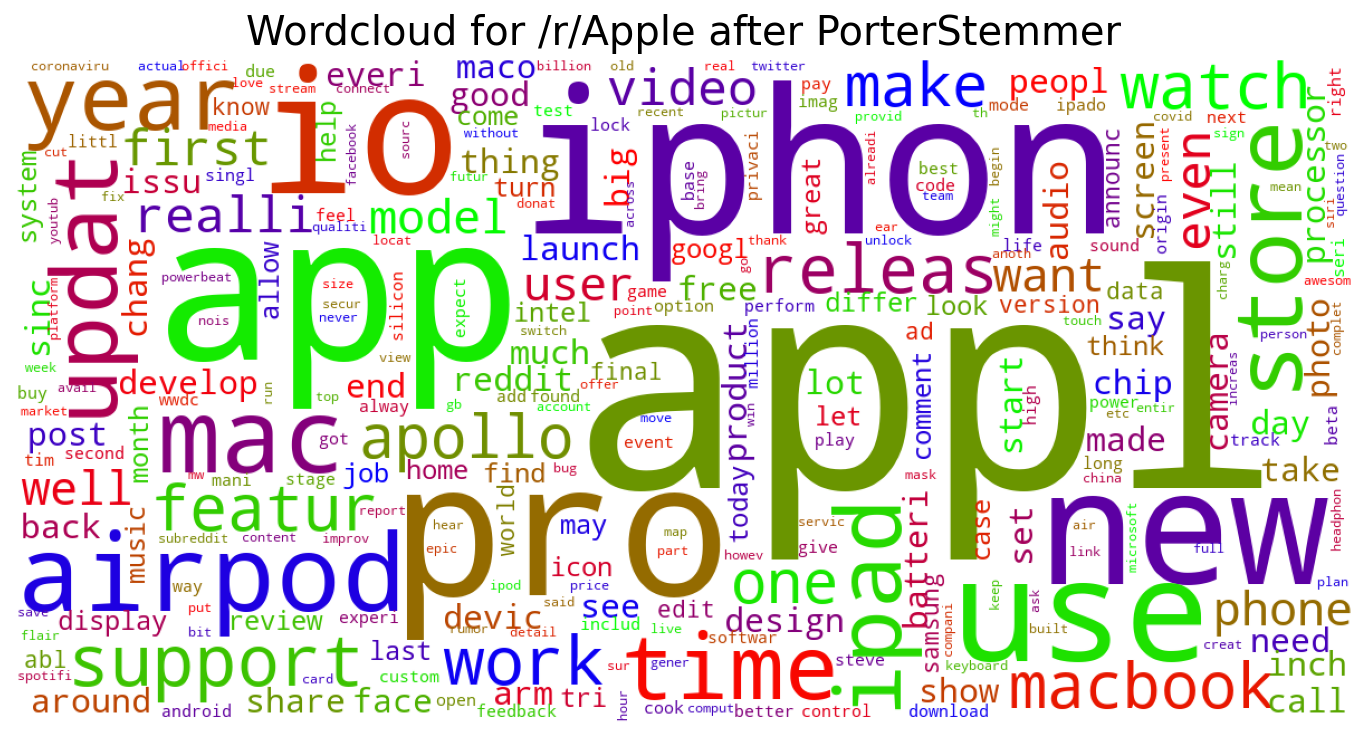

In [31]:
#Show wordcloud for Apple subreddit after PorterStemmer
show_wordcloud(
    apple_stem_str,
    title='Wordcloud for /r/Apple after PorterStemmer',
)

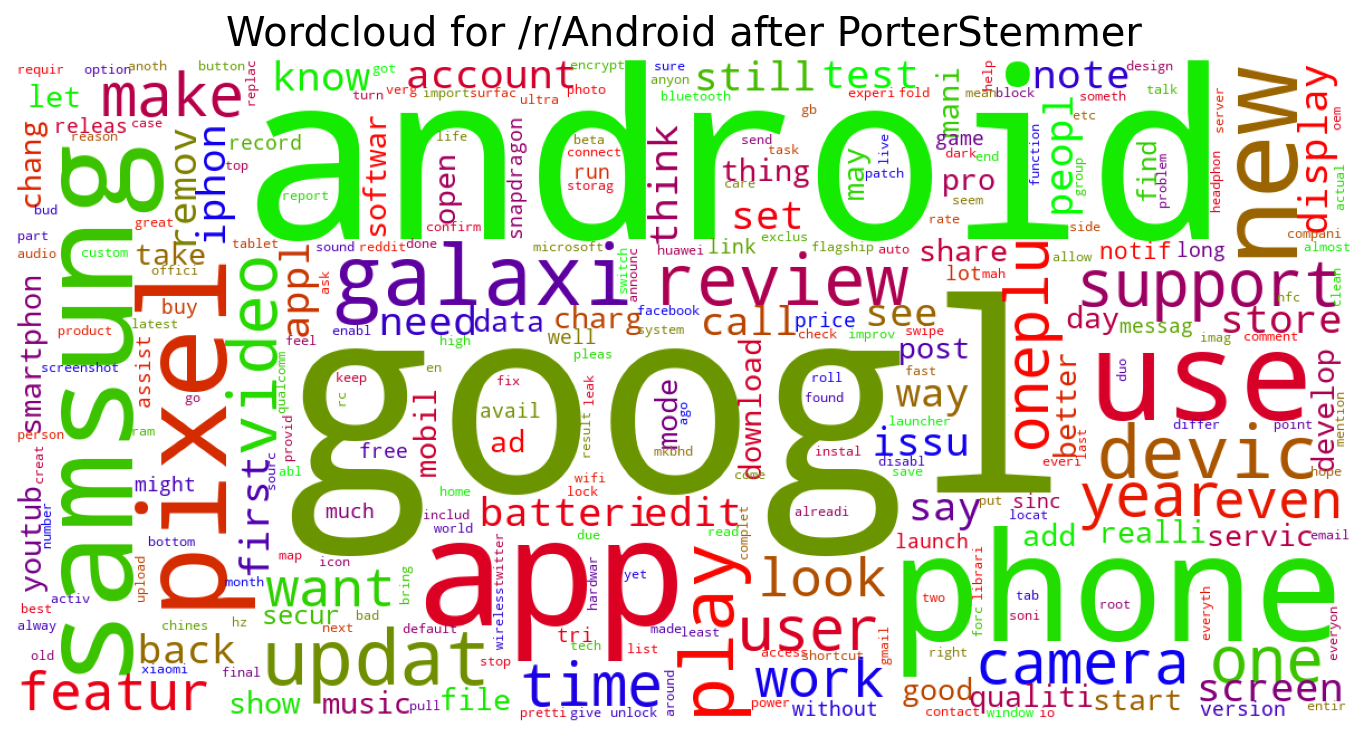

In [32]:
#Show wordcloud for Android subreddit after PorterStemmer
show_wordcloud(
    android_stem_str,
    title='Wordcloud for /r/Android after PorterStemmer',
)

At first glance, it seems that the PorterStemmer preprocessing method has removed or changed the last alphabet of many words (which is the most distinguishing yet 'crude' feature of PorterStemmer). This is apparent in both subreddits' wordclouds, with words in the apple subreddits being changed from their original like 'macos' and 'really' to 'maco' and 'realli'. Other popular words in the apple subreddit such as 'apple' and 'iphone' have also been changed to 'iphon' and 'appl'. 

Similarly, popular words in the Android subreddit also experienced the same treatment, with 'google' becoming 'googl', 'update' becoming 'updat', and 'galaxy' becoming 'galaxi'.

Since lemmatization is known as the more correct and precise way of handling words from a grammatical/morphological point of view while PortStemmer is known to be a crude method of handling words (as evident by the wordclouds above), we will instead just stick to lemmatization during our word preprocessing process.

Analysis of popular words shown in Wordclouds from each subreddit (before CountVectorizer) will be done in the next section under [Lemmatization](#Lemmatization).

#### Lemmatization

In [33]:
#instantiate Lemmatization
lemmatizer = WordNetLemmatizer()

#Lemmatize apple_words and make them into a string for wordcloud
apple_lemma = [lemmatizer.lemmatize(s) for s in apple_words]
apple_lemma_str = ''
for x in apple_lemma:
    apple_lemma_str += (x + ' ')

#Lemmatize android_words and make them into a string for wordcloud
android_lemma = [lemmatizer.lemmatize(s) for s in android_words]
android_lemma_str = ''
for x in android_lemma:
    android_lemma_str += (x + ' ')

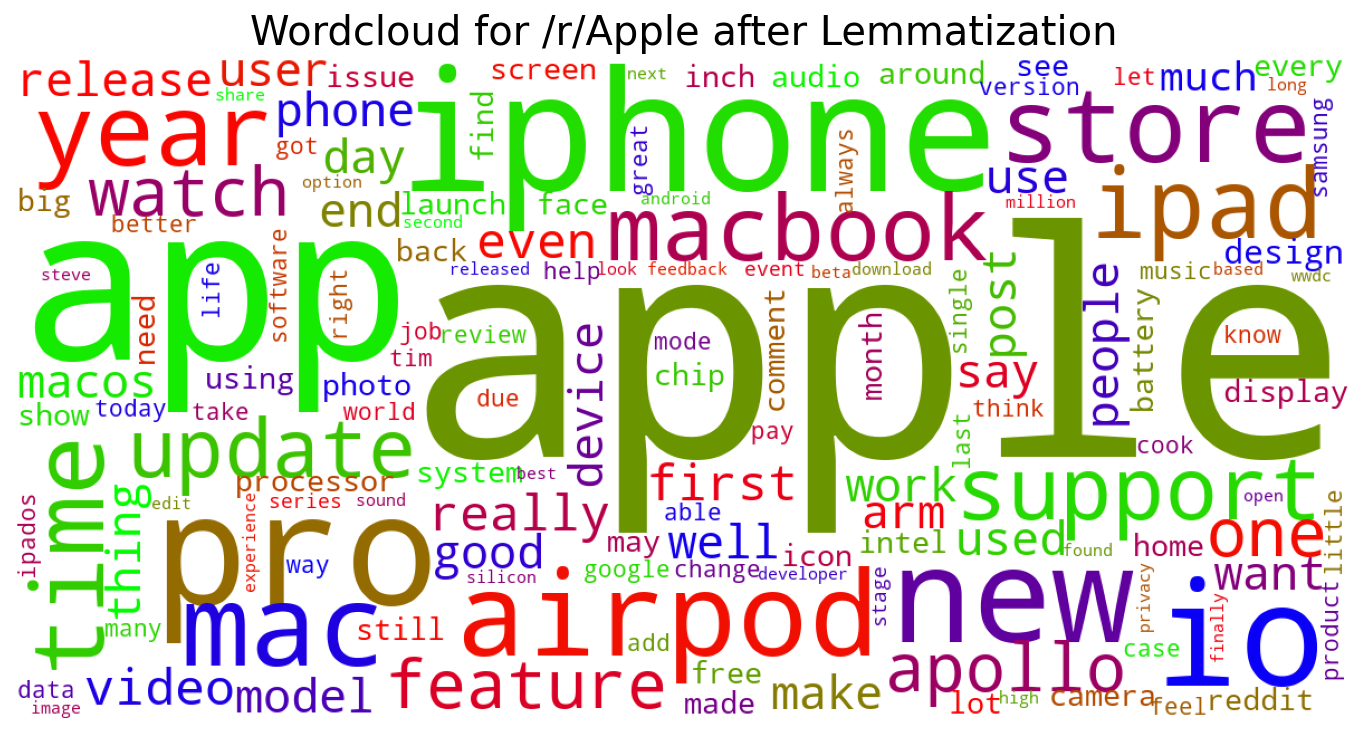

In [34]:
#Show wordcloud for Apple subreddit after Lemmatization
show_wordcloud(
    apple_lemma_str,
    title='Wordcloud for /r/Apple after Lemmatization',
)

It is apparent that 'apple' followed by 'iphone', 'pro', 'app', 'airpod', 'macbook' and 'mac' are the most popular words found in the apple subreddit. This can be explained by the popular usage of iPhones, Macbook Pros, and Airpods by Apple users, and the popularity of the various apps from their App Store. The words 'ipad' and 'watch' are also highly popular as well, which can be also be explained by the popular usage of the iPad and Apple watch by Apple users. 
It seems like some emotion-invoking words such as 'really', 'good', 'well', 'want', and 'much' are also quite popular in the subreddit. 

Words like 'update', 'feature', 'macos', 'io' (stands for ios; 's' got removed due to lemmatization), and 'release' are also very popular in the Apple subreddit. This means that new phone or software releases are very much talked about in the Apple subreddit, with numerous discussions of the software's or product's new features being plastered all over the entire subreddit when news of updates or products are released.

The word 'store' and 'support' seems to be popular too, and upon further research, it seems that many users have complained about the bad customer service and support that is prevalent in numerous apple stores or service centers worldwide. Another reason for the popularity of 'support' is due to the existence of daily tech support threads, which are being created everyday by the moderators due to the thread's popularity on the subreddit.

Not shockingly, an android smartphone brand, 'samsung' is also found among the wordcloud, which means that many users make direct comparisons of products between these two brands (Apple and Samsung).

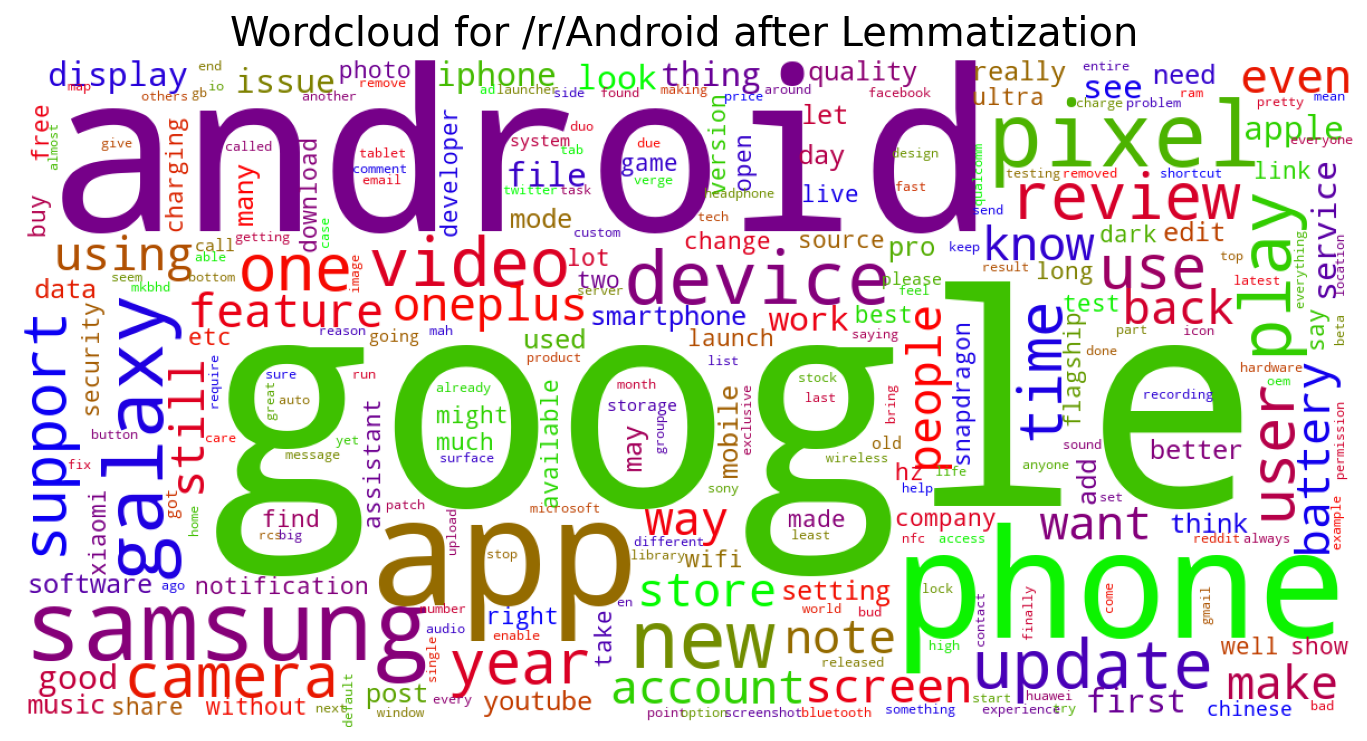

In [35]:
#Show wordcloud for Android subreddit after Lemmatization
show_wordcloud(
    android_lemma_str,
    title='Wordcloud for /r/Android after Lemmatization',
)

Words such as 'google', 'samsung', 'phone', and 'app' are prevalent and huge in Android subreddit's wordcloud, which means that these 4 words are the most frequent words found in the subreddit. This illustrates google's and samsung's popularity in the android community, and also proves that the android phones and app(lications) are highly talked about in the android subreddit. It seems that the most popular models of android phones are Samsung's galaxy series and Google's pixel series, as evident by the huge 'galaxy' and 'pixel' being displayed on the wordcloud.

It seems that the battery durability and quality seems to be an also an issue in some android devices upon further research, which corresponds with the prevalance of 'battery' and 'charging' in the android wordcloud. Similar to apple's wordcloud, 'service' and 'support' are also largely displayed on the wordcloud of android's subreddit. However, upon further research, the reason for their popularity is largely different from Apple's, since the 'service' that is usually talked about in Android is about various new and existing services provided by Android's applications, while 'support' is popular due to the numerous subreddit posts that explain about the new extension or update support provided by Android. 

'Camera' is also another popular word, which corresponds with most android smartphones's greatly advertised camera quality. There are fewer emotion-evoking words on this wordcloud, only including several words such as 'good', 'even', 'need' and 'well'.

'Review' is also another popular word in the android subreddit, which shows that reviews of various android smartphones or devices are highly popular in the android community. Just like the wordcloud of Apple's subreddit, this wordcloud also contains a keyword from Apple, 'iphone', which means that a pretty significant number of users do compare the iPhone with some Android phones (most probably Samsung's).

### More Cleaning of Text

In this section, we will continue our text cleaning process through the usage of lemmatization. Barplots showing the top 25 words will be plotted after executing CountVectorization, and we will be comparing the results from both plots (wordcloud and barplot) to determine the exact rank of these popular words after CountVectorization.

At the same time, let's check for any highly-ranked duplicated words (words that appear in both subreddits) so that we can remove them.

#### Lemmatization

In [36]:
#instantiate Lemmatization
lemmatizer = WordNetLemmatizer()

In [37]:
#create a function that splits and then lemmatize each word
def lemmatize_words(text):
    words = text.split()
    lemma_words = ''
    for word in words:
        lemma_words += (lemmatizer.lemmatize(word) + ' ')
    return lemma_words

In [38]:
#apply lemmatizer to cleaned_text_df's text column
cleaned_text_df['text'] = cleaned_text_df['text'].apply(lemmatize_words)

In [39]:
#check cleaned_text_df
cleaned_text_df.head(4)

text  target
0  fornite removed app store implemented direct p...       1
1   phone call finally stop taking entire screen io        1
2  epic game say apple terminating developer acco...       1
3                  apple employee cut copy paste dy        1

### Count Vectorization

#### Before removing duplicated words

In [40]:
#create function that plot barplots showing top 25 words for each subreddit
def create_barplot(data_1, data_2, title_1, title_2):
    plt.figure(figsize=(22,17), facecolor='white')
    plt.subplot(2,2,1)
    data_1.sort_values().tail(25).plot(kind='barh')
    plt.title(title_1, fontsize=19)
    plt.xlabel('Counts', fontsize=15)
    plt.ylabel('Words', fontsize=15)
    plt.tick_params(axis = 'x', labelsize = 17)
    plt.tick_params(axis = 'y', labelsize = 17)

    plt.subplot(2,2,2)
    data_2.sort_values().tail(25).plot(kind='barh')
    plt.title(title_2, fontsize=19)
    plt.xlabel('Counts', fontsize=15)
    plt.ylabel('Words', fontsize=15)
    plt.tick_params(axis = 'x', labelsize = 17)
    plt.tick_params(axis = 'y', labelsize = 17)

    plt.tight_layout()

In [41]:
#Instantiate CountVectorizer
cvec = CountVectorizer()

In [42]:
#get all apple subreddit's text data
apple_data = cleaned_text_df[cleaned_text_df['target'] == 1]['text']

#countvectorise apple subreddit's text data, and make it into a dataframe
cvec_apple = pd.DataFrame(cvec.fit_transform(apple_data).todense(), 
                          columns=cvec.get_feature_names())

#get the sum of each word count
cvec_apple_count = cvec_apple.sum(axis=0)

In [43]:
#get all android subreddit's text data
android_data = cleaned_text_df[cleaned_text_df['target'] == 0]['text']

#countvectorise android subreddit's text data, and make it into a dataframe
cvec_android = pd.DataFrame(cvec.fit_transform(android_data).todense(), 
                          columns=cvec.get_feature_names())

#get the sum of each word count
cvec_android_count = cvec_android.sum(axis=0)

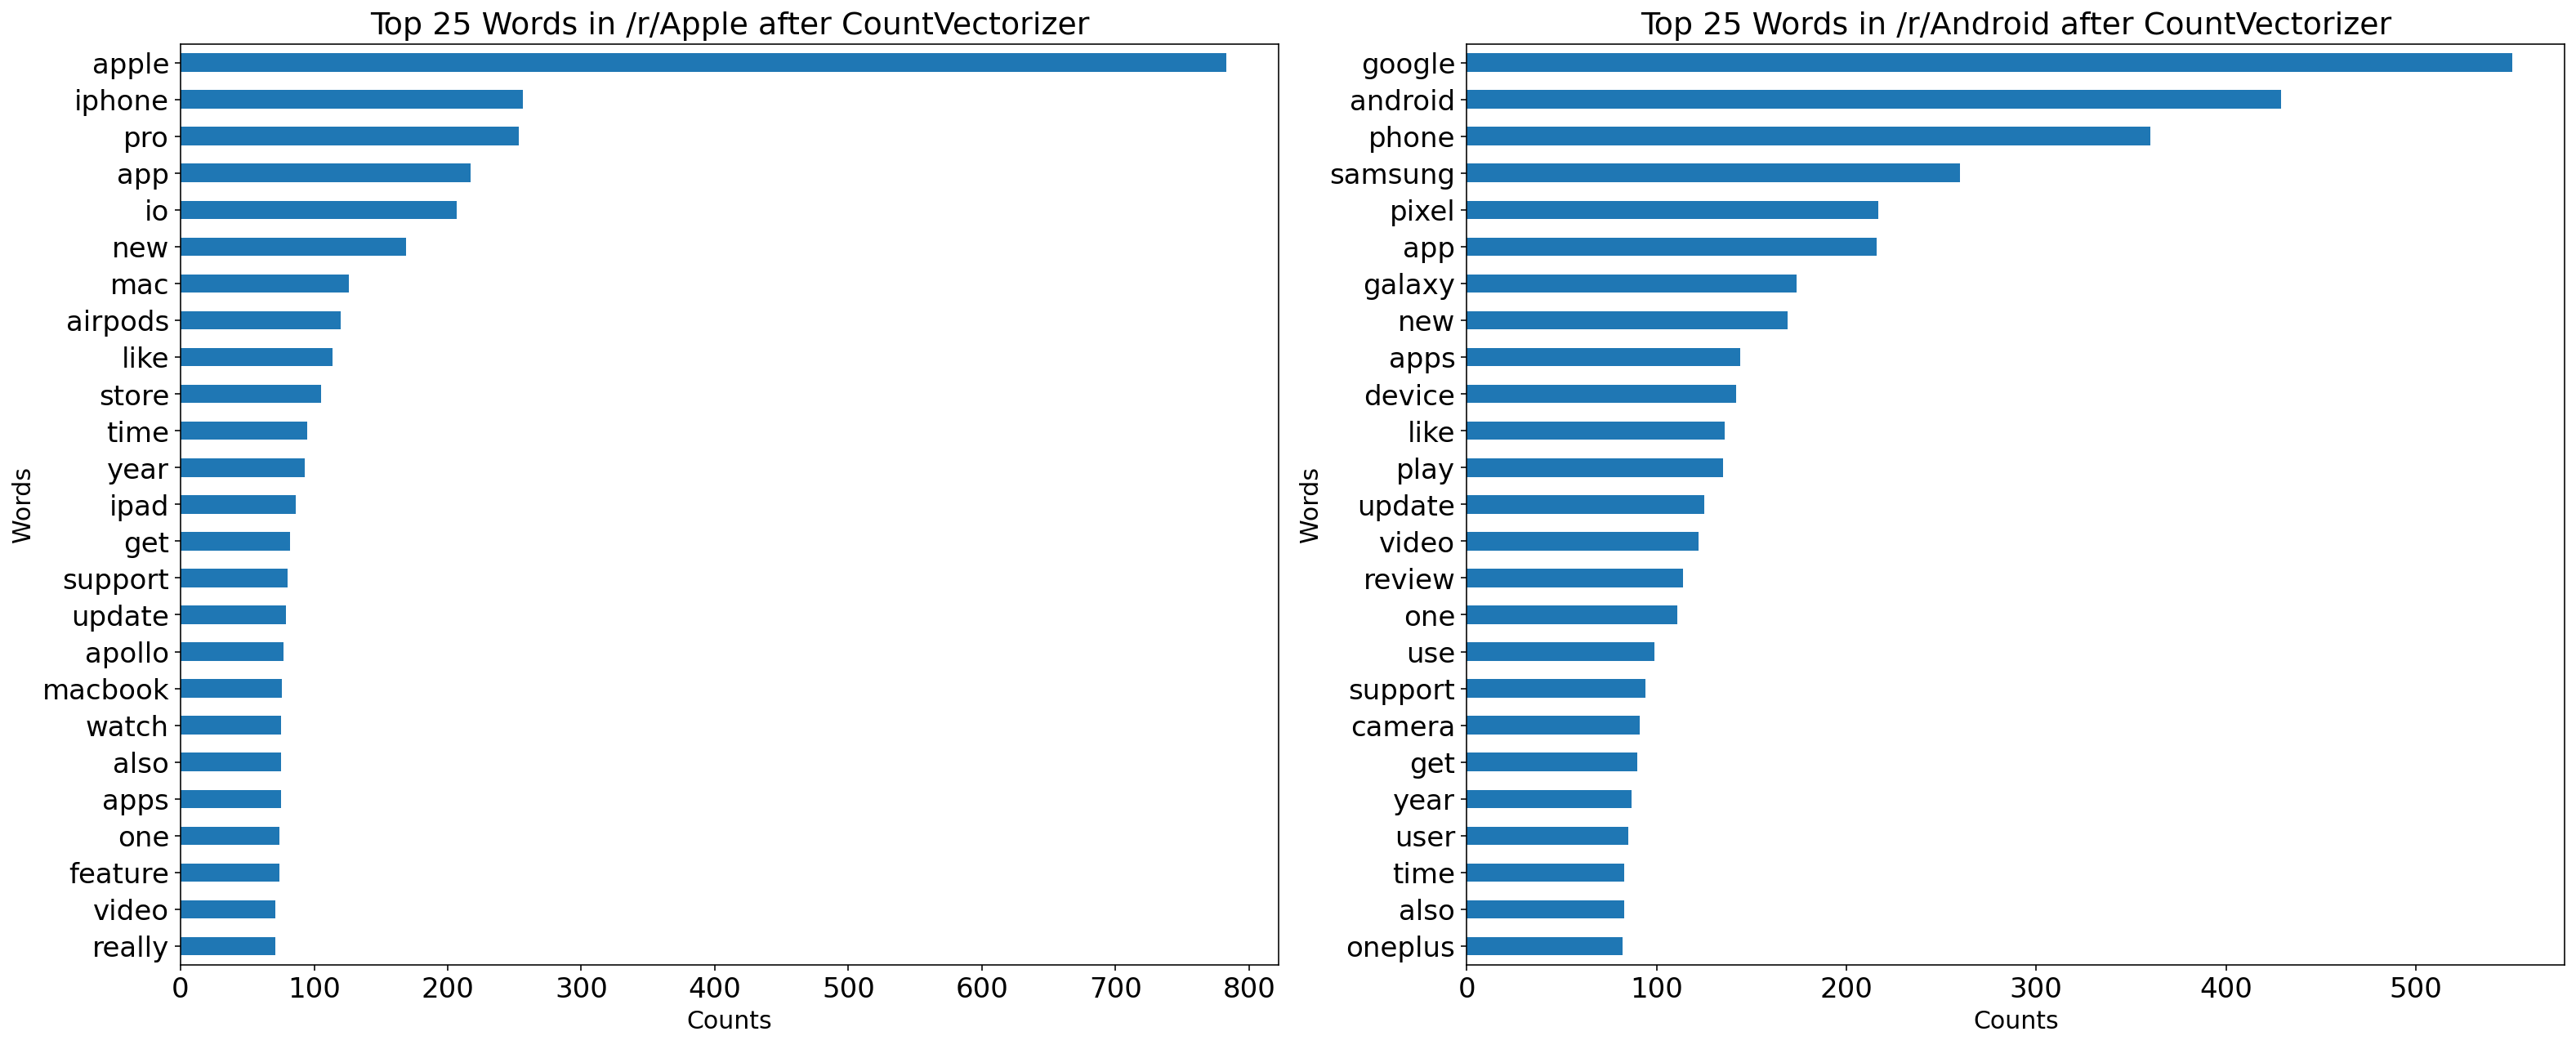

In [44]:
#Plot top 25 words in both subreddits
create_barplot(cvec_apple_count, cvec_android_count, 'Top 25 Words in /r/Apple after CountVectorizer',
                'Top 25 Words in /r/Android after CountVectorizer')

With many words that are duplicated in both subreddits (in particular, 'app', 'apps', 'new', 'get', 'support', 'update', 'like', 'also', 'one'), this trend of numerous duplicated words corresponds with our wordclouds, since many similar words appeared in both subreddits' wordclouds. We will be removing these words, before moving on to the analysis of their barcharts. 

#### Removal of Duplicated Words

In [45]:
#Group all words that appear in top 25 words for both Apple and Android subreddits
duplicated_words = ['app', 'apps', 'new', 'get', 'support', 'update', 'like', 'also', 'one']

In [46]:
#drop all duplicated words
cleaned_text_df['text'] = cleaned_text_df['text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in duplicated_words))
cleaned_text_df.head()

text  target
0   fornite removed store implemented direct payment       1
1    phone call finally stop taking entire screen io       1
2  epic game say apple terminating developer acco...       1
3                   apple employee cut copy paste dy       1
4  apple epic store account following legal two c...       1

#### After removing duplicated words

In [47]:
#get all apple subreddit's text data
apple_data = cleaned_text_df[cleaned_text_df['target'] == 1]['text']

#countvectorise apple subreddit's text data, and make it into a dataframe
cvec_apple = pd.DataFrame(cvec.fit_transform(apple_data).todense(), 
                          columns=cvec.get_feature_names())

#get the sum of each word count
cvec_apple_count = cvec_apple.sum(axis=0)

In [48]:
#get all android subreddit's text data
android_data = cleaned_text_df[cleaned_text_df['target'] == 0]['text']

#countvectorise android subreddit's text data, and make it into a dataframe
cvec_android = pd.DataFrame(cvec.fit_transform(android_data).todense(), 
                          columns=cvec.get_feature_names())

#get the sum of each word count
cvec_android_count = cvec_android.sum(axis=0)

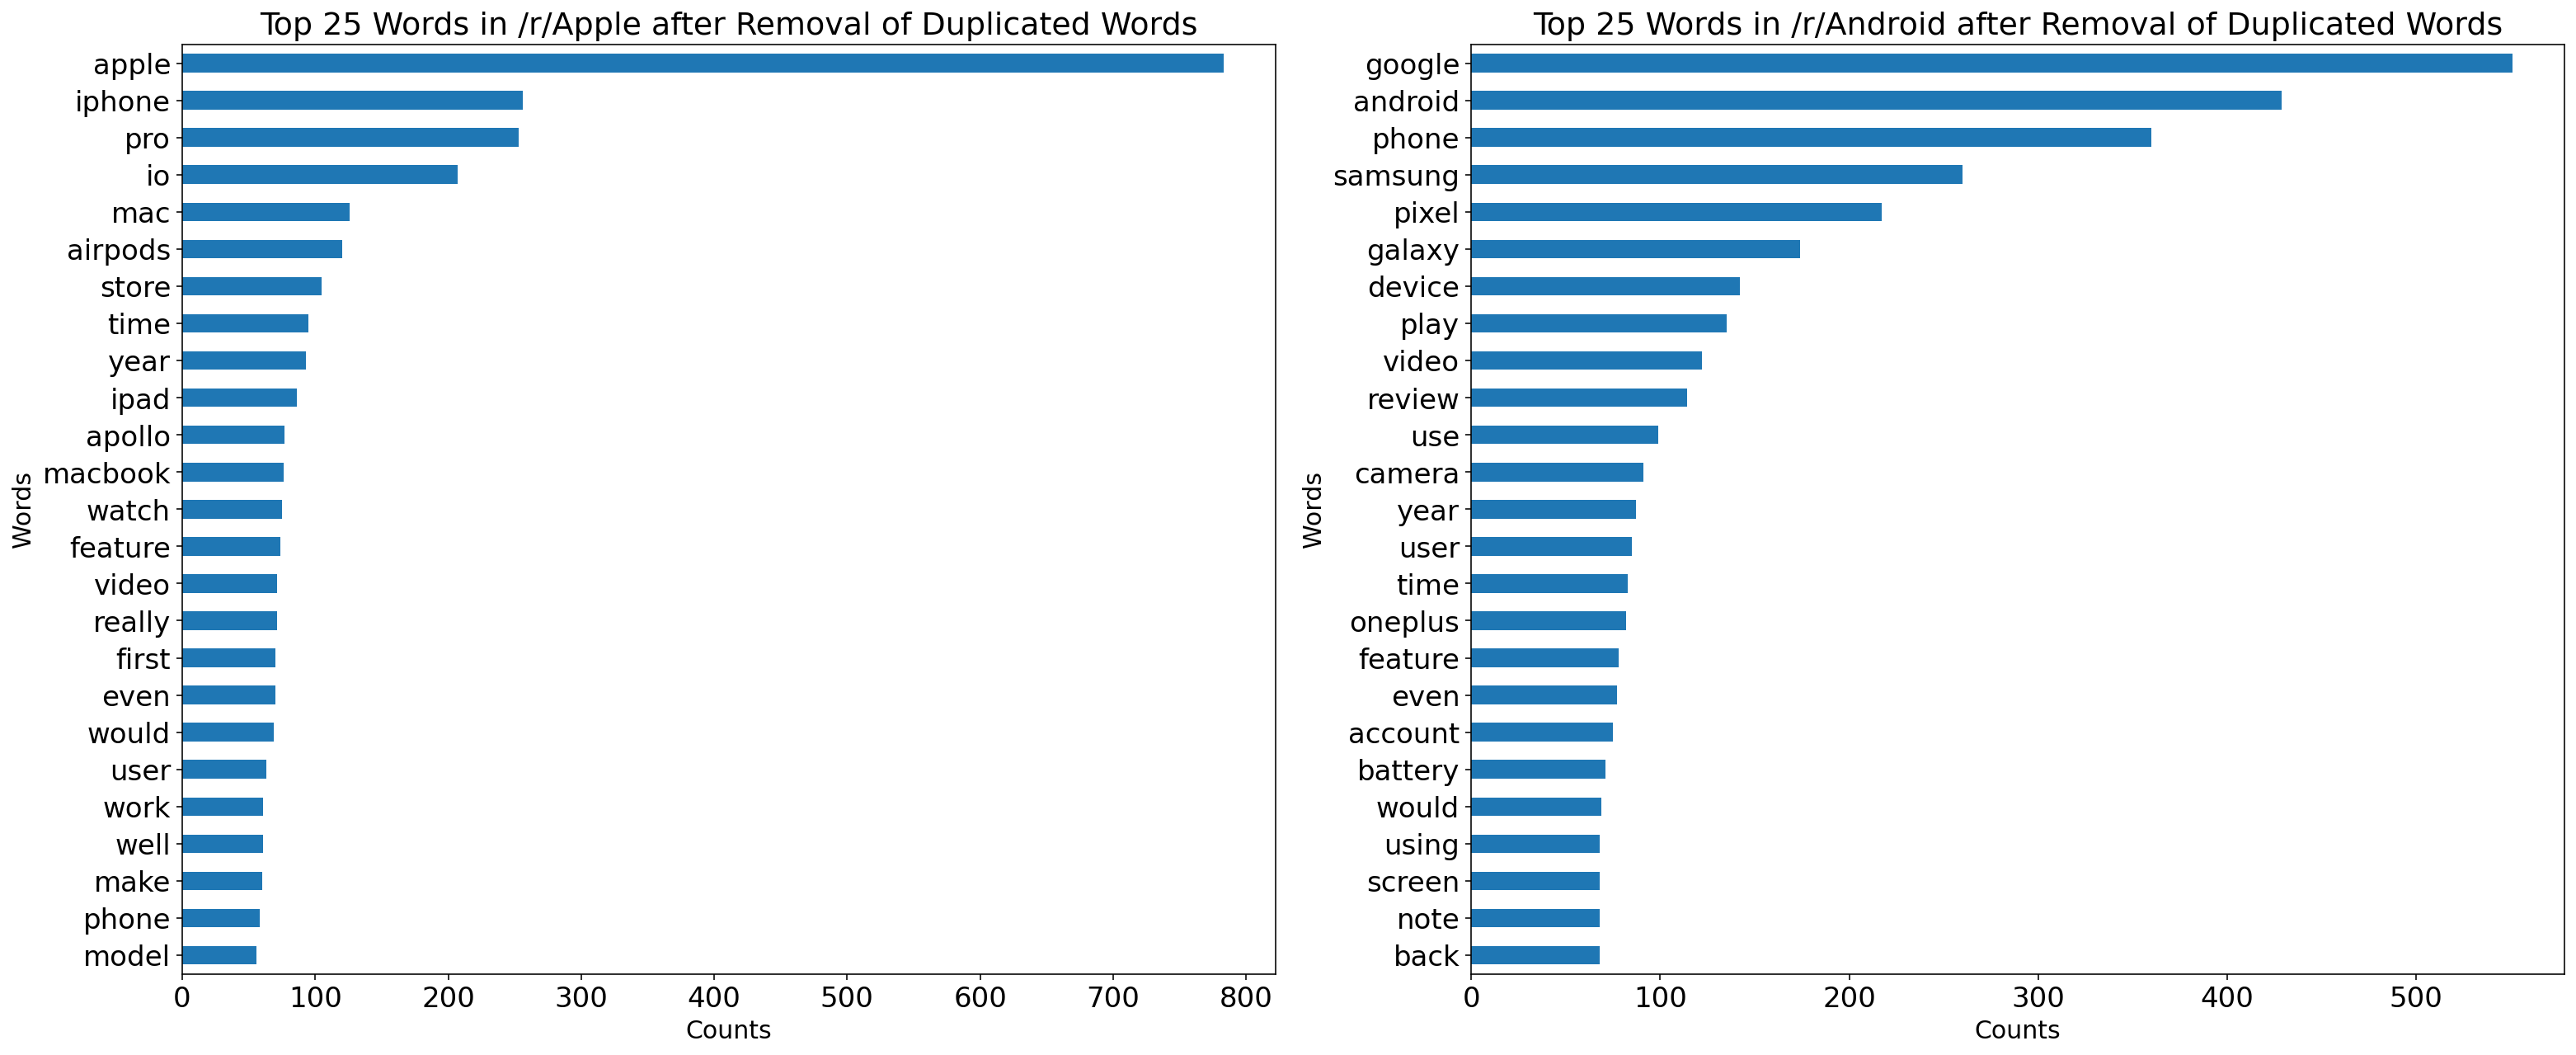

In [49]:
#Plot top 25 words in both subreddits after removal of duplicated words
create_barplot(cvec_apple_count, cvec_android_count, 'Top 25 Words in /r/Apple after Removal of Duplicated Words',
                'Top 25 Words in /r/Android after Removal of Duplicated Words')

The top 25 words correspond to our wordclouds above. Even though we got a glimpse of the most popular words from each subreddit through our wordclouds, it is interesting to see their exact rank as shown on the bar charts above.

<b>Apple<br></b>
Looking at the bar charts above, the top 6 words for apple's subreddit are 'apple', 'iphone', 'pro', 'io' (which is converted from 'ios' to 'io' due to lemmatization), 'mac' and 'airpods'. It is definitely not a surprise to see these product-related and feature-related words ranking high since just as we explained above, Apple's most popular products includes the iPhone, Macbook Pro, and Airpods. Furthermore, apple's integral features such as the the io(s) operating system, and apple 'store' are also widely discussed by Apple users online. 

Interestingly, even though the product is named the 'macbook pro', the 'macbook' keyword is lower down in the list at no. 12, as compared to 'pro' and 'mac' which is ranked highly at no. 3 and no. 5 respectively. This means that people usually substitute the word 'mac' for 'macbook'; typing 'mac pro' for 'macbook pro'. 
There are many other popular apple products that are ranked within the top 25, such as 'watch' (from apple watch), 'ipad'. Other highly-ranked words seem to geared towards describing emotions, such as 'really', 'even', 'would', 'well'. It's no surprise here that most words here corresponds with our apple subreddit's wordcloud.

<b>Android</b><br>
On the other hand, the top 5 words for Android are 'google', 'android', 'phone', 'samsung' and 'pixel'. With 'google' and 'pixel' ranking high in the subreddit, it proves that the Google Pixel product is a hot favourite among Android users, while smartphones from Samsung is second in popularity (with 'samsung' ranking 4th and 'galaxy' ranking sixth). This definitely corresponds to Google's and Samsung's popularity in real life, with both phones being compared to Apple's on news and review sites. Google's high rank can also be explained by several Google apps that are already pre-installed on most Android smartphones<sup>[[4]](https://marketrealist.com/2019/08/googles-android-will-remain-top-long-time/)</sup>, which will cause numerous discussions of Google and their associated apps on the subreddit.

The battery life or durability really seems to be a huge complaint of some android smartphones, as 'battery' seems to be ranked quite highly in the top 25 at rank 20. This definitely corresponds to numerous bad reviews about the depleting battery life of common Android phones upon research. 

## Distributions
### Sentiment Analysis

After determining the polarity of each word from cleaned_data_df, the distributions of the polarity of the words will be plotted so as to illustrate how negative or positive sentiments are in each subreddit.

In [50]:
#Define a function that accepts text and returns its polarity.
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [51]:
#Create a new column for sentiment 
cleaned_text_df['sentiment'] = cleaned_text_df.text.apply(detect_sentiment)

In [52]:
#create function to plot sentiment distribution histogram for each subreddit
def plot_sentiment(data_mask, title):
    subreddit = data_mask
    plt.hist(subreddit['sentiment'])
    plt.title(title, fontsize=15);
    plt.xlabel('<--------- Negative ---------- Neutral ---------- Positive --------->\n Sentiment', fontsize=12)
    plt.ylabel('Number of words/text', fontsize=12)

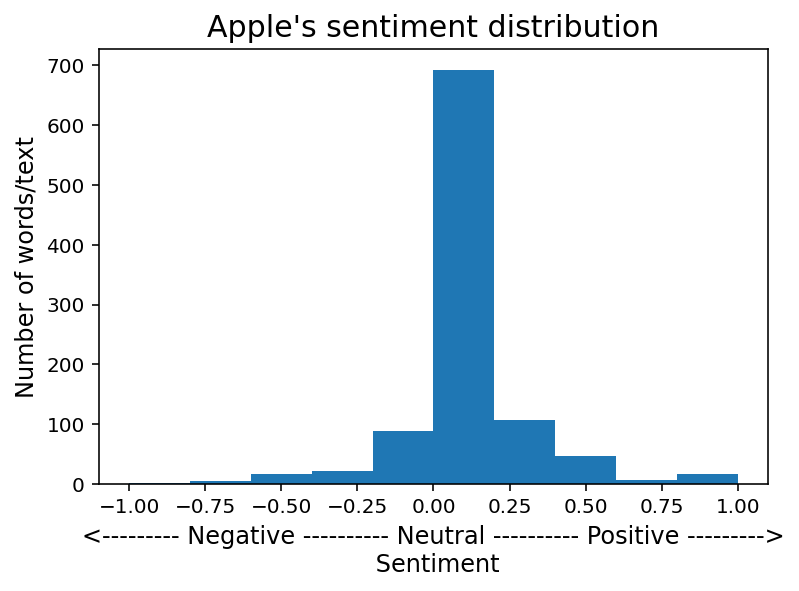

In [53]:
#Apple's sentiment distribution histogram
plot_sentiment(cleaned_text_df[cleaned_text_df['target'] == 1], 'Apple\'s sentiment distribution')

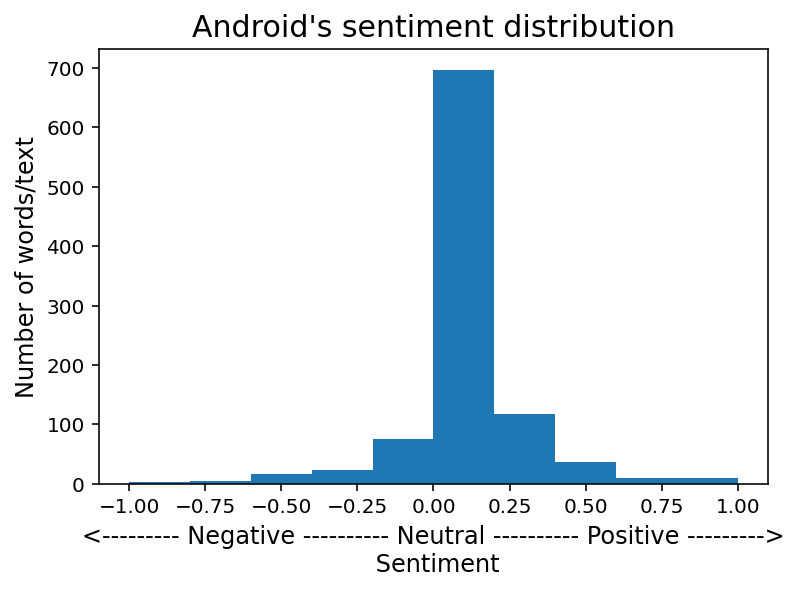

In [54]:
#Android's sentiment distribution histogram
plot_sentiment(cleaned_text_df[cleaned_text_df['target'] == 0], 'Android\'s sentiment distribution')

Looking at the distribution of sentiments above for both Android and Apple subreddits, it seems that both subreddits' sentiments lean towards neutral, with their peaks at around 0 to 0.25 polarity. This means that most of the posts on both subreddits are mostly neutral, with little to no negative or positive sentiments to their words. 

Interestly, it seems that the sentiments for both subreddits are almost normally distributed, with a very slight right-skew. 

We will be checking the summary statistics for their exact mean and median figures in the next section to determine if the sentiments for both subreddits are normally distributed.

### Summary Statistics

In [55]:
#summary statistics of cleaned_text_df
cleaned_text_df.describe()

target    sentiment
count  1993.000000  1993.000000
mean      0.501254     0.063784
std       0.500124     0.216966
min       0.000000    -1.000000
25%       0.000000     0.000000
50%       1.000000     0.000000
75%       1.000000     0.125000
max       1.000000     1.000000

Looking at the summary statistics of our cleaned_text_df, it seems that we have pretty balanced classes since our mean is at 0.5012 (50.12%), which is definitely great for our classification problem at hand. 

In [56]:
#apple subreddit's summary statistics
cleaned_text_df[cleaned_text_df['target']==1].describe()

target   sentiment
count   999.0  999.000000
mean      1.0    0.065298
std       0.0    0.218706
min       1.0   -1.000000
25%       1.0    0.000000
50%       1.0    0.000000
75%       1.0    0.123500
max       1.0    1.000000

In [57]:
#android subreddit's summary statistics
cleaned_text_df[cleaned_text_df['target']==0].describe()

target   sentiment
count   994.0  994.000000
mean      0.0    0.062263
std       0.0    0.215303
min       0.0   -1.000000
25%       0.0    0.000000
50%       0.0    0.000000
75%       0.0    0.125000
max       0.0    1.000000

Looking at both android and apple subreddits' summary statistics, it is evident that both subreddits have a very slight right-skew to their sentiment distribution (with the mean, though very close to 0, being slightly larger than the mean). 

Comparing the means of the sentiments from both subreddits, it appears that the sentiment on the apple subreddit is slightly better than the sentiment of android's (apple's 0.065 as compared to android's 0.062). Overall, both subreddits' sentiments are very close to neutral, since both of their medians are 0 with their means being extremely close to 0 as well.

### Assumptions

In [58]:
#check shape
cleaned_text_df.shape

(1993, 3)

Text(0.5, 0, 'Value')

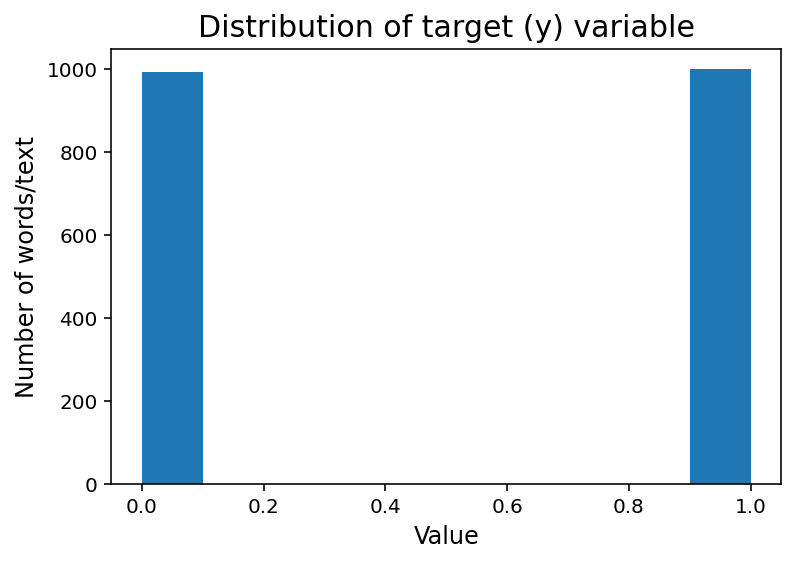

In [59]:
#Plot distribution of y variable (target)
plt.hist(cleaned_text_df['target'])
plt.title('Distribution of target (y) variable', fontsize=15);
plt.ylabel('Number of words/text', fontsize=12)
plt.xlabel('Value', fontsize=12)

Naive Bayes Classifier: <br>
The assumptions for this classifier are that the predictors/features are independent, and that all the predictors have an equal effect on the outcome. Since we have removed several highly-ranked duplicated words from both subreddits, we can assume that our predictors are close to being independent, and can have an almost equal effect on the outcome.  

Random Forest:<br>
The only assumption for random forest is how sampling should be representative. This assumption is most likely met in our project since our combined sample (n) is quite huge with a total of 1993 posts, as seen above with the shape of the cleaned_text_df.

Logistic regression:<br>
Assumptions are (1) the X independent variables are independent of each other, (2) the observations/dependent variables y are independent of each other, (3) each observation in y follows a Bernoulli distribution, and (4) linearity of independent variables and log odds.
Looking at these assumptions, it seems that most of the assumptions are being met since the independent and dependent (X and y variables) are independent of each other, and each observation in y follows a Bernoulli distribution as seen above on the histogram chart.

Hence, given that most assumptions are met, we are able to answer our problem statement with the data obtained.

## Modelling

In [60]:
#Set X and y variable
X = cleaned_text_df['text']
y = cleaned_text_df['target']

### Baseline
#### Naive Baseline

In [61]:
#Calculating baseline accuracy
y.value_counts(normalize=True)

1    0.501254
0    0.498746
Name: target, dtype: float64

In [62]:
#baseline accuracy
y.value_counts(normalize=True)[1]

0.5012543903662819

The baseline accuracy is the percentage of the majority class, and serves as the benchmark for our model to beat. Looking at our naive baseline, the baseline accuracy of a post coming from the Apple subreddit (target = 1) is 50.13%.

### Train-test split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=22,
                                                    stratify=y)

### Execution of Models

We will be preprocessing our data with either CountVectorizer and TfidfVectoriser, followed by execution of the following models:
1. Multinomial Naive Bayes
2. Logistic Regression
3. Random Forest

Due to the project's requirement, the multinomial Naive Bayes model was chosen among all the Naive Bayes classifiers available since Multinomial Naive Bayes classifier works well for data which can easily be turned into counts, such as word counts in text. Since word counts are present in our data, hence this classification model was selected.

The Logistic Regression model was also selected due to the classification nature of our project, which essentially classifies whether a post is from apple or android (target value 1 or 0). On the other hand, the Random Forest model was chosen due to the model's advantage of tackling correlation between various decision trees which do occur in our case.

The comparison of all models used will be done in the next section under [Selection and Evaluation of Model](Selection-and-Evaluation-of-Model).

In [64]:
#since we are using gridsearch for hyperparameter tuning:
#make a function that prints the model's best parameters, scores and difference
def print_score(model):
    print('Best_params: ', model.best_params_)
    print('Best score: ', round(model.best_score_,4))
    print('Score for X_train and y_train:', round(model.score(X_train, y_train),4))
    print('Score for X_test and y_test:', round(model.score(X_test, y_test),4))
    print('Difference between train and test:', round((model.score(X_train, y_train)-model.score(X_test, y_test)),4))

For now, we will print various classification metrics for each model. However, we will only evaluate our models based on a few relevant metrics in the next section (largely based on accuracy metric).

In [65]:
#make a function that prints all classification metrics (as well as TP, FP, TN, FN)
def classication_metrics(model):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Negatives: " + str(tn))
    print("False Positives: " + str(fp))
    print("False Negatives: " + str(fn))
    print("True Positives: " + str(tp))
    print()
    print('--------------------------------')
    print()
    print('Accuracy: {}'.format(round(metrics.accuracy_score(y_test, y_pred), 4)))
    print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
    print('Precision: {}'.format(round(metrics.precision_score(y_test, y_pred), 4)))
    print('Recall: {}'.format(round(metrics.recall_score(y_test, y_pred), 4)))
    print('Specificity: {}'.format(round(tn/(tn+fp),4)))

In [66]:
#make a function that prints the metrics score only (for the final model section)
def classification_metrics_only(model):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Accuracy: {}'.format(round(metrics.accuracy_score(y_test, y_pred), 4)))
    print('Misclassification rate: {}'.format(round((fp+fn)/(tp+fp+tn+fn),4)))
    print('Precision: {}'.format(round(metrics.precision_score(y_test, y_pred), 4)))
    print('Recall: {}'.format(round(metrics.recall_score(y_test, y_pred), 4)))
    print('Specificity: {}'.format(round(tn/(tn+fp),4)))

### Multinomial Naive Bayes 

#### With CountVectorizer

In [67]:
#pipeline with MultinomialNB and CountVectorizer
base_mnb_cv = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

params = {  
    'cvec__max_features': [1000, 1500, 2000, 3000], 
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [.9, .95],
    'mnb__alpha': [0.5, 0.75, 1, 1.25]
}

#hyperparameter tuning with gridsearchCV
gs_mnb_cv = GridSearchCV(base_mnb_cv, param_grid=params, cv=5, verbose=1)
gs_mnb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [1000, 1500, 2000, 3000],
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'mnb__alpha': [0.5, 0.75, 1, 1.25]},
             verbose=1)

In [68]:
print_score(gs_mnb_cv)

Best_params:  {'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'mnb__alpha': 1.25}
Best score:  0.9257
Score for X_train and y_train: 0.9598
Score for X_test and y_test: 0.9078
Difference between train and test: 0.052


In [69]:
classication_metrics(gs_mnb_cv)

True Negatives: 225
False Positives: 24
False Negatives: 22
True Positives: 228

--------------------------------

Accuracy: 0.9078
Misclassification rate: 0.0922
Precision: 0.9048
Recall: 0.912
Specificity: 0.9036


#### With TfidfVectorizer

In [70]:
#pipeline with MultinomialNB and TfidfVectorizer
base_mnb_tv = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

params = {  
    'tvec__max_features': [3000, 3250, 3500],
    'tvec__ngram_range': [(1, 1), (1, 2)], 
    'mnb__alpha': [2.25, 2.5, 2.75, 3,]
}

#hyperparameter tuning with gridsearchCV
gs_mnb_tv = GridSearchCV(base_mnb_tv, param_grid=params, cv=5, verbose=1)
gs_mnb_tv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    8.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'mnb__alpha': [2.25, 2.5, 2.75, 3],
                         'tvec__max_features': [3000, 3250, 3500],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [71]:
print_score(gs_mnb_tv)

Best_params:  {'mnb__alpha': 2.75, 'tvec__max_features': 3250, 'tvec__ngram_range': (1, 1)}
Best score:  0.931
Score for X_train and y_train: 0.9752
Score for X_test and y_test: 0.9459
Difference between train and test: 0.0293


In [72]:
classication_metrics(gs_mnb_tv)

True Negatives: 233
False Positives: 16
False Negatives: 11
True Positives: 239

--------------------------------

Accuracy: 0.9459
Misclassification rate: 0.0541
Precision: 0.9373
Recall: 0.956
Specificity: 0.9357


### Logistic Regression

#### CountVectorizer

In [73]:
#pipeline with Logistic Regression and CountVectorizer
base_lr_cv = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(random_state = 22))
])

params = {  
    'cvec__max_features': [4000, 5000, 6000, 7000], 
    'cvec__ngram_range': [(1, 1), (1, 2)], 
    'lr__penalty': ['l1', 'l2'], 
    'lr__solver': ['liblinear'],
    'lr__C': np.logspace(7,18,10)
}

#hyperparameter tuning with gridsearchCV
gs_lr_cv = GridSearchCV(base_lr_cv, param_grid=params, cv=3, verbose=1)
gs_lr_cv.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   41.7s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=22))]),
             param_grid={'cvec__max_features': [4000, 5000, 6000, 7000],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'lr__C': array([1.00000000e+07, 1.66810054e+08, 2.78255940e+09, 4.64158883e+10,
       7.74263683e+11, 1.29154967e+13, 2.15443469e+14, 3.59381366e+15,
       5.99484250e+16, 1.00000000e+18]),
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear']},
             verbose=1)

In [74]:
print_score(gs_lr_cv)

Best_params:  {'cvec__max_features': 6000, 'cvec__ngram_range': (1, 2), 'lr__C': 46415888336.127914, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best score:  0.909
Score for X_train and y_train: 1.0
Score for X_test and y_test: 0.9118
Difference between train and test: 0.0882


In [75]:
classication_metrics(gs_lr_cv)

True Negatives: 224
False Positives: 25
False Negatives: 19
True Positives: 231

--------------------------------

Accuracy: 0.9118
Misclassification rate: 0.0882
Precision: 0.9023
Recall: 0.924
Specificity: 0.8996


#### With TfidfVectorizer

GridSearchCV

In [76]:
#pipeline with Logistic Regression and TfidfVectorizer
base_lr_tv = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression(random_state = 22))
])

params = {  
    'tvec__max_features': [4000, 5000, 6000],
    'tvec__ngram_range': [(1, 1), (1, 2)], 
    'lr__penalty': ['l1', 'l2'], 
    'lr__solver': ['liblinear'],
    'lr__C': np.logspace(7,18,10)
}

#hyperparameter tuning with gridsearchCV
gs_lr_tv = GridSearchCV(base_lr_tv, param_grid=params, cv=3, verbose=1)
gs_lr_tv.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   28.8s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lr',
                                        LogisticRegression(random_state=22))]),
             param_grid={'lr__C': array([1.00000000e+07, 1.66810054e+08, 2.78255940e+09, 4.64158883e+10,
       7.74263683e+11, 1.29154967e+13, 2.15443469e+14, 3.59381366e+15,
       5.99484250e+16, 1.00000000e+18]),
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear'],
                         'tvec__max_features': [4000, 5000, 6000],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [77]:
print_score(gs_lr_tv)

Best_params:  {'lr__C': 166810053.72000557, 'lr__penalty': 'l2', 'lr__solver': 'liblinear', 'tvec__max_features': 5000, 'tvec__ngram_range': (1, 2)}
Best score:  0.9157
Score for X_train and y_train: 1.0
Score for X_test and y_test: 0.9259
Difference between train and test: 0.0741


In [78]:
classication_metrics(gs_lr_tv)

True Negatives: 228
False Positives: 21
False Negatives: 16
True Positives: 234

--------------------------------

Accuracy: 0.9259
Misclassification rate: 0.0741
Precision: 0.9176
Recall: 0.936
Specificity: 0.9157


### Random Forest

#### CountVectorizer

In [79]:
#pipeline with Random Forest Classifier and CountVectorizer
base_rf_cv = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier(random_state = 22))
])

params = {
    'cvec__max_features': [3000, 3500, 4000], 
    'cvec__ngram_range': [(1, 1), (1, 2)], 
    'rf__n_estimators': [90, 100, 110],
    'rf__max_depth': [None, 1, 2]
}

#hyperparameter tuning with gridsearchCV
gs_rf_cv = GridSearchCV(base_rf_cv, param_grid=params, cv=5, verbose=1)
gs_rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.6min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=22))]),
             param_grid={'cvec__max_features': [3000, 3500, 4000],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'rf__max_depth': [None, 1, 2],
                         'rf__n_estimators': [90, 100, 110]},
             verbose=1)

In [80]:
print_score(gs_rf_cv)

Best_params:  {'cvec__max_features': 3500, 'cvec__ngram_range': (1, 1), 'rf__max_depth': None, 'rf__n_estimators': 100}
Best score:  0.9418
Score for X_train and y_train: 1.0
Score for X_test and y_test: 0.9419
Difference between train and test: 0.0581


In [81]:
classication_metrics(gs_rf_cv)

True Negatives: 238
False Positives: 11
False Negatives: 18
True Positives: 232

--------------------------------

Accuracy: 0.9419
Misclassification rate: 0.0581
Precision: 0.9547
Recall: 0.928
Specificity: 0.9558


#### TfidfVectorizer

In [82]:
#pipeline with Random Forest Classifier and TfidfVectorizer
base_rf_tv = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier(random_state = 22))
])

params = {
    'tvec__max_features': [6000, 7000, 7500],
    'tvec__ngram_range': [(1, 1), (1, 2)], 
    'rf__n_estimators': [20, 25, 30],
    'rf__max_depth': [None, 1, 2]
}

#hyperparameter tuning with gridsearchCV
gs_rf_tv = GridSearchCV(base_rf_tv, param_grid=params, cv=5, verbose=1)
gs_rf_tv.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   41.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=22))]),
             param_grid={'rf__max_depth': [None, 1, 2],
                         'rf__n_estimators': [20, 25, 30],
                         'tvec__max_features': [6000, 7000, 7500],
                         'tvec__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [83]:
print_score(gs_rf_tv)

Best_params:  {'rf__max_depth': None, 'rf__n_estimators': 25, 'tvec__max_features': 7000, 'tvec__ngram_range': (1, 2)}
Best score:  0.9351
Score for X_train and y_train: 1.0
Score for X_test and y_test: 0.9379
Difference between train and test: 0.0621


In [84]:
classication_metrics(gs_rf_tv)

True Negatives: 234
False Positives: 15
False Negatives: 16
True Positives: 234

--------------------------------

Accuracy: 0.9379
Misclassification rate: 0.0621
Precision: 0.9398
Recall: 0.936
Specificity: 0.9398


## Selection and Evaluation of Model

<b><u>Legend</b></u><br>
CV: CountVectorizer<br>
TF: TfidVectorizer<br>
MNB: MultinomialNB<br>
LR: Logistic Regression<br>
RFC: Random Forest Classifier<br>
TN: True Negative<br>
FP: False Positive<br>
FN: False Negative<br>
TP: True Positive<br>

Summarising all the results above, we have:

|Preprocessor| Model| Train Accuracy| Test Accuracy| Difference|TN|FP|FN| TP|Accuracy|Precision|Misclassification|Recall|Specificity
|----|---- |----  |---- |----|----|----|----|----|----|----|----|----|----
| CV| MNB| 0.9598| 0.9078| 0.0520|225|24|22|228|0.9078|0.9048|0.0922|0.912|0.9036
| TF| MNB| 0.9752| 0.9459| 0.0293|233|16|11|239|0.9459|0.9373|0.0541|0.956|0.9357
| CV| LR| 1.0| 0.9118| 0.0882|224|25|19|231|0.9118|0.9023|0.0882|0.924|0.8996
| TF| LR| 1.0| 0.9259| 0.0741|228|21|16|234|0.9259|0.9176|0.0741|0.936|0.9157
| CV| RFC| 1.0| 0.9419| 0.0581|238|11|18|232|0.9419|0.9547|0.0581|0.928|0.9558
| TF| RFC| 1.0| 0.9379| 0.0621|234|15|16|234|0.9379|0.9398|0.0621|0.936|0.9398

In [85]:
#our baseline accuracy
round(y.value_counts(normalize=True)[1],4)

0.5013

Comparing all the models' test accuracy to our baseline accuracy, all six models surpassed our baseline accuracy score of 50.13% by a huge extent, with all 6 models' accuracy values being above 90% as compared to the low baseline accuracy of 50.13%.

The main metric chosen to evaluate the model is the accuracy rate, since we have quite balanced classes and our model would not suffer from having an inaccurate but high accuracy score that comes from imbalanced classes. Comparing the accuracy values for all 6 models, it seems that two models have similar high accuracy values, with 94.59% for TfidfVectorized MultinomialNB model (TF-MNB) model and 94.19% accuracy for CountVectorized Random Forest Classific model (CV-RFC) model.

However, comparing the difference of the test and train accuracy, TF-MNB has a smaller variance difference as compared to CV-RFC (TF-MNB's 0.0293 difference as compared to CV-RFC's 0.0581 difference), which means that the TF-MNB model has slightly less of an overfit.

Since there are two best-performing models that have similar high accuracy rate, we will next be evaluating their recall (true positive rate) and specificity (true negative rate) metrics since we aim to optimise the number of true positives and true negatives for this subreddit post classification problem.

<b>Our two best-performing models</b>

|Preprocessor| Model| Train Accuracy| Test Accuracy| Difference|TN|FP|FN| TP|Accuracy|Precision|Misclassification|Recall|Specificity
|----|---- |----  |---- |----|----|----|----|----|----|----|----|----|----
| TF| MNB| 0.9752| 0.9459| 0.0293|233|16|11|239|0.9459|0.9373|0.0541|0.956|0.9357
| CV| RFC| 1.0| 0.9419| 0.0581|238|11|18|232|0.9419|0.9547|0.0581|0.928|0.9558

It seems that the TF-MNB performs better in its recall/true positive rate but less in its specificity/true negative rate as compared to the CV-RFC. This means that for the TF-MNB model; among those posts in which the model predicted them to be from the apple subreddit, the TF-MNB model got more accurate predictions for this case (more true positives) than the CV-RFC model. However, on the other hand, CV-RFC performed better by getting more accurate predictions for posts that were predicted to be from the android subreddit (more true negatives).


To further compare these two models, their ROC AUC score (with ROC curve) will be studied since this is a binary classification problem, and it is hard to conclude which model perform the best since both models perform their best at either their recall or specificity rate. Since ROC-AUC visualises the tradeoff between true positive rate (recall) and false positive rate (1-specificity), we have decided to study the ROC-AUC curve and score for both models to see if it provides with any other insights with regards to the selection of our best model. 

Both TF-MNB and CV-RFC models will now be executed with their optimal hyperparameters.

### Comparing Both Models

In [86]:
#make a function that plots roc curve
def plot_roc(dataframe, model_str):
    #Create figure.
    plt.figure(figsize = (10,7))

    #Create threshold values.
    thresholds = np.linspace(0, 1, 200)

    #Define function to calculate sensitivity. (True positive rate.)
    def TPR(df, true_col, pred_prob_col, threshold):
        true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
        false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
        return true_positive / (true_positive + false_negative)

    #Define function to calculate 1 - specificity. (False positive rate.)
    def FPR(df, true_col, pred_prob_col, threshold):
        true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
        false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
        return 1 - (true_negative / (true_negative + false_positive))

    #Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
    tpr_values = [TPR(dataframe, 'true_values', 'pred_probs', prob) for prob in thresholds]
    fpr_values = [FPR(dataframe, 'true_values', 'pred_probs', prob) for prob in thresholds]

    #Plot ROC curve.
    plt.plot(fpr_values, # False Positive Rate on X-axis
             tpr_values, # True Positive Rate on Y-axis
             label='ROC Curve')

    #Plot baseline. (Perfect overlap between the two populations.)
    plt.plot(np.linspace(0, 1, 200),
             np.linspace(0, 1, 200),
             label='baseline',
             linestyle='--')

    #Label axes.
    plt.title('Receiver Operating Characteristic Curve of' + ' ' + model_str, fontsize=22)
    plt.ylabel('Sensitivity (True Positive Rate)', fontsize=18)
    plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=18)

    #Create legend.
    plt.legend(fontsize=16);

#### Multinomial Naive Bayes (with TfidfVectorizer)

In [87]:
#pipeline for Multinomial Naive Bayes (TfidfVectorized)
base_mnb_tv = Pipeline([
    ('tvec', TfidfVectorizer(ngram_range= (1, 1), max_features= 3250)),
    ('mnb', MultinomialNB(alpha= 2.75))
])

base_mnb_tv.fit(X_train, y_train)

#get cross-validated score for base_mnb_tv
print(cross_val_score(base_mnb_tv, X_train, y_train, cv = 5, scoring='roc_auc').mean())
print(cross_val_score(base_mnb_tv, X_test, y_test, cv = 5, scoring='roc_auc').mean())

0.9817697701304746
0.9662742857142858


In [88]:
# Let's create a dataframe called mnb_pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

mnb_pred_proba = [i[1] for i in base_mnb_tv.predict_proba(X_test)]

mnb_pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':mnb_pred_proba})

#get roc auc score
print('ROC AUC score is:', roc_auc_score(mnb_pred_df['true_values'], mnb_pred_df ['pred_probs']))

ROC AUC score is: 0.9842570281124499


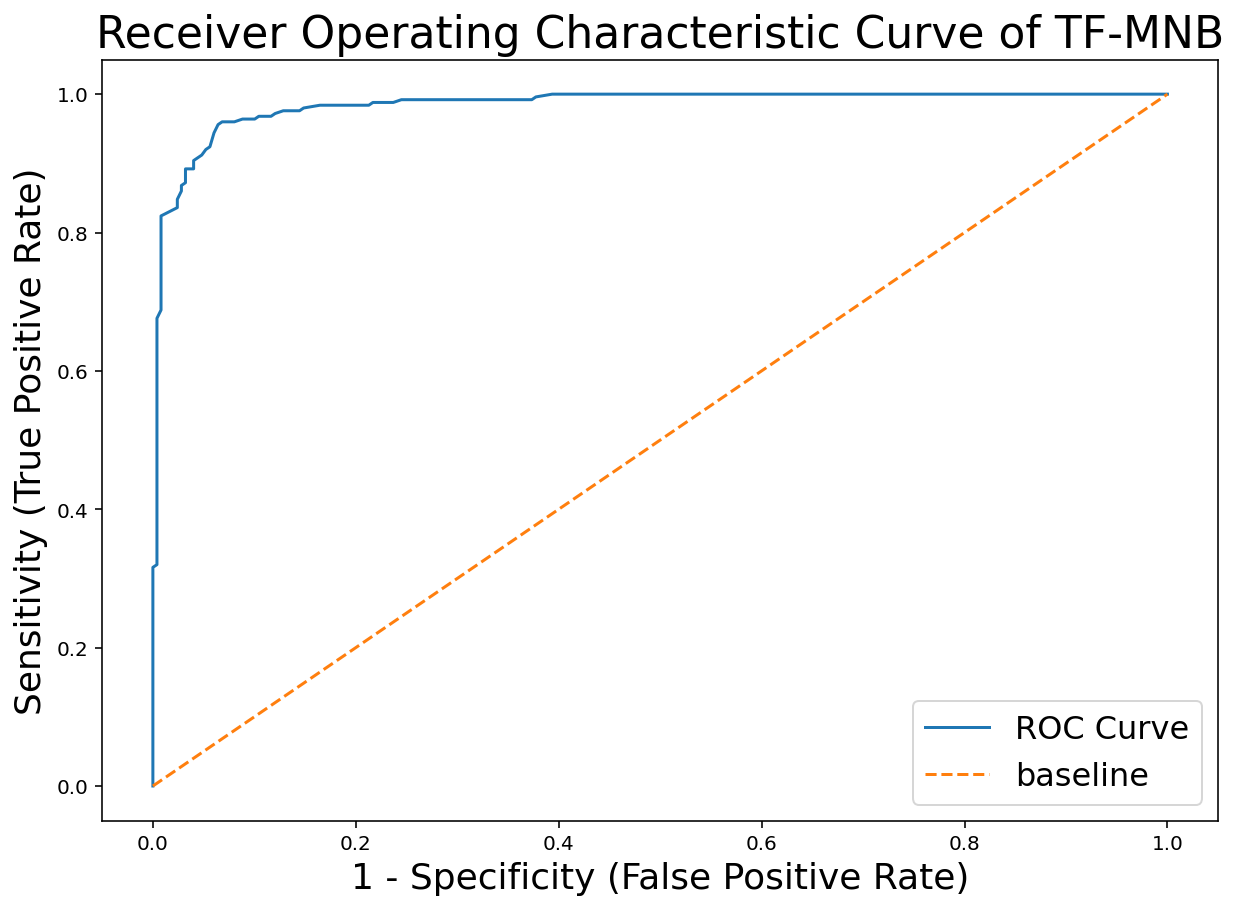

In [89]:
#plot roc curve
plot_roc(mnb_pred_df, 'TF-MNB')

#### Random Forest (with CountVectorizer)

In [90]:
#pipeline for Random Forest (CountVectorized)
base_rf_cv = Pipeline([
    ('cvec', CountVectorizer(max_features= 3500, ngram_range= (1, 1))),
    ('rf', RandomForestClassifier(random_state = 22, max_depth= None, n_estimators= 100))
])

base_rf_cv.fit(X_train, y_train)

#get cross-validated score for base_rf_cv
print(cross_val_score(base_rf_cv, X_train, y_train, cv = 5, scoring='roc_auc').mean())
print(cross_val_score(base_rf_cv, X_test, y_test, cv = 5, scoring='roc_auc').mean())

0.9878607269942796
0.9711575510204081


In [91]:
# Let's create a dataframe called rf_pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

rf_pred_proba = [i[1] for i in base_rf_cv.predict_proba(X_test)]

rf_pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':rf_pred_proba})

#get auc score
print('ROC AUC score is:', roc_auc_score(rf_pred_df['true_values'], rf_pred_df['pred_probs']))

ROC AUC score is: 0.9833654618473896


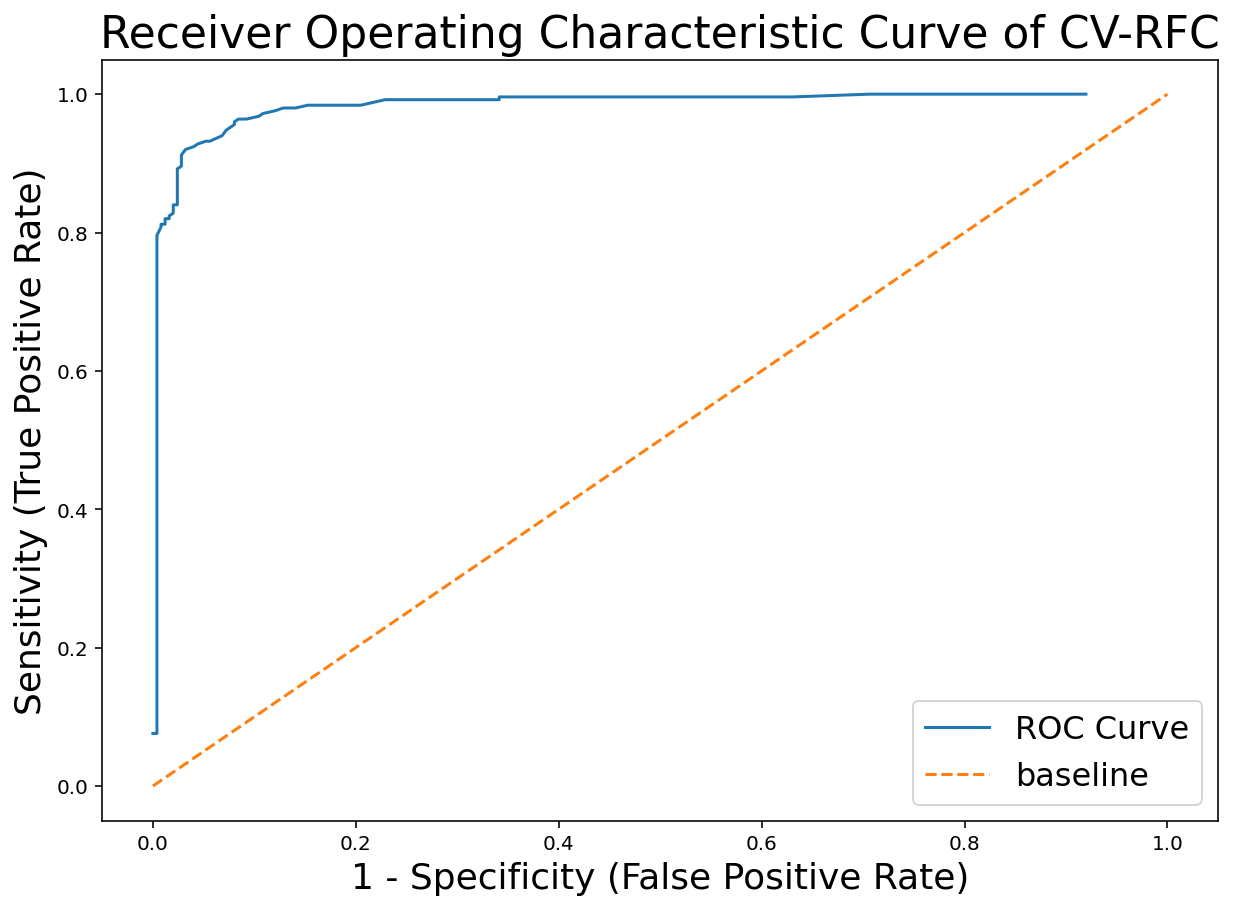

In [92]:
#plot roc curve
plot_roc(rf_pred_df, 'CV-RFC')

### Selection of our Final Model
####  Evaluate ROC AUC

|Preprocessor| Model| Train Accuracy| Test Accuracy| Difference|TN|FP|FN| TP|Accuracy|Precision|Misclassification|Recall|Specificity|ROC AUC
|----|---- |----  |---- |----|----|----|----|----|----|----|----|----|----|----
| TF| MNB| 0.9752| 0.9459| 0.0293|233|16|11|239|0.9459|0.9373|0.0541|0.956|0.9357|0.9843
| CV| RFC| 1.0| 0.9419| 0.0581|238|11|18|232|0.9419|0.9547|0.0581|0.928|0.9558|0.9834

Comparing the AUCs of both TF-MNB and CV-RFC models, TF-MNB appears to have a slightly higher AUC (0.9843) as compared to CV-RFC (0.9834), which means that the positive and negative populations are almost close to perfectly separated for both models, with TF-MNB having slightly more separated populations as compared to CV-RFC. This also means that TF-MNB model has a slightly higher AUC area under the ROC curve than CV-RFC.

After comparing their selected classification metrics, the Multinomial Naive Bayes (with TfidfVectorizer) model seems to perform the best. Hence, we will be selecting this TF-MNB model as our prediction model.

## Our Final Model
### TF-MNB

In [93]:
#pipeline for Multinomial Naive Bayes (TfidfVectorized)
base_mnb_tv = Pipeline([
    ('tvec', TfidfVectorizer(ngram_range= (1, 1), max_features= 3250)),
    ('mnb', MultinomialNB(alpha= 2.75))
])

base_mnb_tv.fit(X_train, y_train)
#cross-validated score 
print('Train accuracy score is:', round(base_mnb_tv.score(X_train, y_train), 4))
print('Test accuracy score is:', round(base_mnb_tv.score(X_test, y_test), 4))

Train accuracy score is: 0.9752
Test accuracy score is: 0.9459


### Evaluation of our chosen model

|Preprocessor| Model| Train Accuracy| Test Accuracy| Difference|TN|FP|FN| TP|Accuracy|Precision|Misclassification|Recall|Specificity|AUC
|----|---- |----  |---- |----|----|----|----|----|----|----|----|----|----|----
| TfidfVectorizer| MultinomialNB| 0.9752| 0.9459| 0.0293|233|16|11|239|0.9459|0.9373|0.0541|0.956|0.9357|0.9843

Text(0.5, 1.0, 'Confusion Matrix')

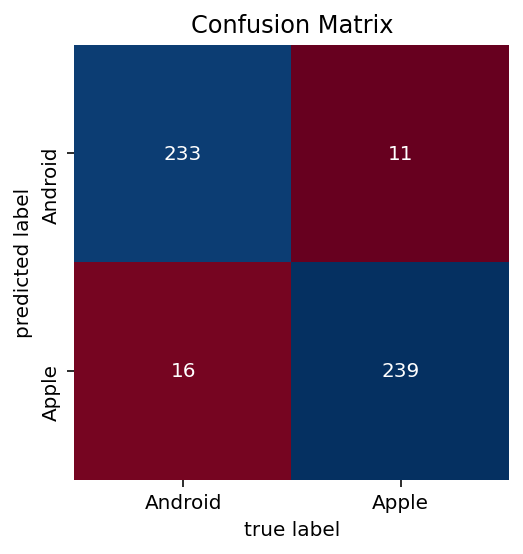

In [94]:
#Plot confusion matrix
y_pred = base_mnb_tv.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False,
            xticklabels=['Android', 'Apple'], yticklabels=['Android', 'Apple'])
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix')

In [95]:
#print classification metrics with ROC AUC score
classification_metrics_only(base_mnb_tv)
print('ROC AUC:', round(roc_auc_score(mnb_pred_df['true_values'], mnb_pred_df ['pred_probs']), 4))

Accuracy: 0.9459
Misclassification rate: 0.0541
Precision: 0.9373
Recall: 0.956
Specificity: 0.9357
ROC AUC: 0.9843


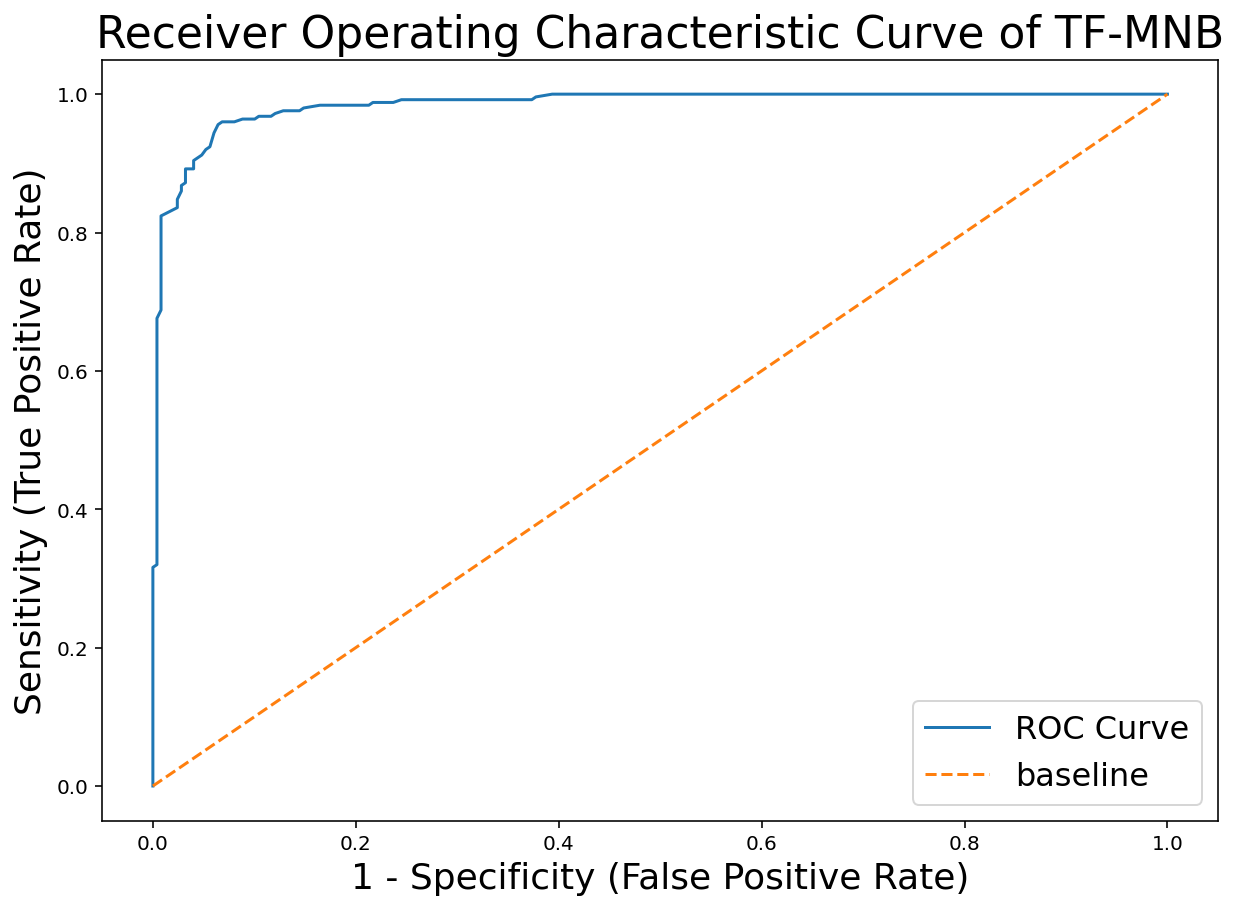

In [96]:
#plot roc curve for final model
plot_roc(mnb_pred_df, 'TF-MNB')

With a high accuracy of 0.9459 and a small misclassification rate of 0.0541, this means that out of all predictions made, 94.59% of the posts (472 posts) were predicted to be in the right subreddit while a small 5.41%  (27 posts) were predicted to be in the wrong subreddit. This means that this model has a very high accuracy rate. However, let's look at the other metrics as well.

The precision score tells us that out of all the apple subreddit predictions made, a high 93.73% (amounting to 239 posts) were correctly predicted, with only a small 6.27% (amounting to 16 posts) being predicted wrongly. Similarly, the recall score tells us that out of all android subreddit predictions made, a high percentage of 95.6% (233 posts) were predicted correctly with only a small 4.4% (11 posts) of posts that were predicted wrongly to be in the android subreddit. With high precision and recall rates, this means that this model has fewer false positives and false negatives.

The specificity score of 0.9357 is high as well, which means that among all posts predicted by the model to be from the android subreddit, 93.57% (233) of the predictions were correct. Since the model has pretty high accuracy rate, it also has a high AUC score of 0.9843, which means the model has good measure of separability
and has a huge AUC area under the ROC curve.

#### Most important words

In [97]:
#function to get the top 25 most important words for each subreddit
def get_important_words(pipeline, model, vector, class_ind):
    words = pipeline.named_steps[vector].get_feature_names()
    
    #since feature_log_prob gives the log probability of features, we will inverse it
    zipped = list(zip(words, np.exp(pipeline.named_steps[model].feature_log_prob_[class_ind])))
    sorted_zip = sorted(zipped, key=lambda t: t[1], reverse=True)
    dataframe = pd.DataFrame(columns = ['word', 'coef'])
    for x, y in sorted_zip[:25]:
        dataframe = dataframe.append(pd.Series([x, y],index =dataframe.columns), ignore_index=True)
    return dataframe


In [98]:
#function to plot the most important words for each subreddit
def plot_important_words(data, title):
    sns.barplot(x=data['coef'], y=data['word'])
    plt.title(title, fontsize=12);
    plt.ylabel('Word', fontsize=10)
    plt.xlabel('Coefficient', fontsize=10)
    sns.set(rc={'figure.figsize':(15,10)})

In [99]:
#top 25 important words for apple subreddit
apple_salient_top_25 = get_important_words(base_mnb_tv, 'mnb', 'tvec', 1)

#top 25 important words for android subreddit
android_salient_top_25 = get_important_words(base_mnb_tv, 'mnb', 'tvec', 0)

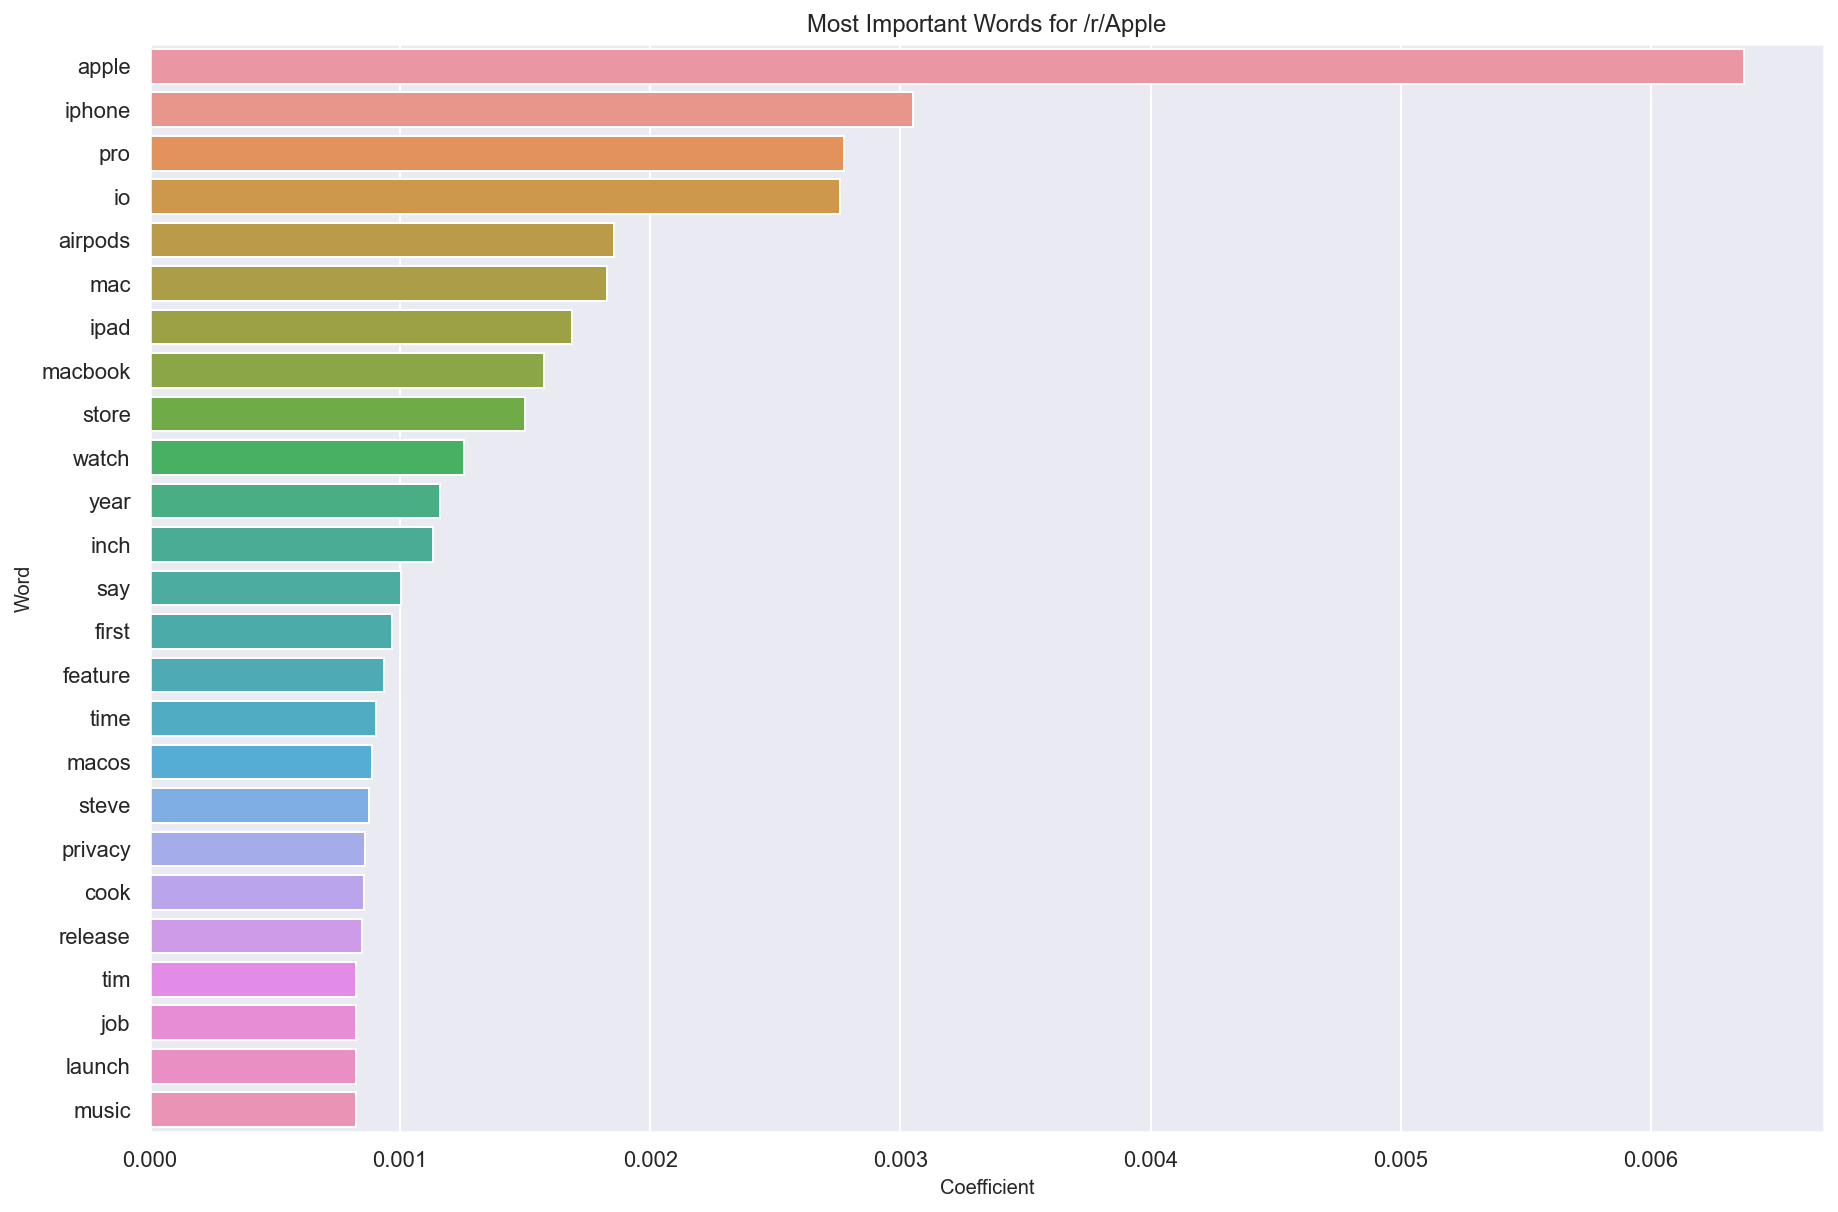

In [101]:
#plot barplot of top 25 most important words for apple subreddit
plot_important_words(apple_salient_top_25, 'Most Important Words for /r/Apple')

According to our model TF-MNB, it seems that the most important words mostly corresponds to the bar charts as plotted above (under the section of [After removing duplicated words](#After-removing-duplicated-words)). However, a few new words were being prioritised by the model, such as 'macos', 'steve', 'tim', and 'music'. With Steve Jobs and Tim Cook being influential figures for Apple, this definitely explains why the model made these two words important for the Apple subreddit. With Apple Music being the default music player for and MacOS being the operating system for Macbooks, this also explains why these two words are ranked in the top 25 important words for this subreddit. This means that words like the 4 aforementioned words are highly indicative in deciding whether a post is found from the Apple subreddit or not.

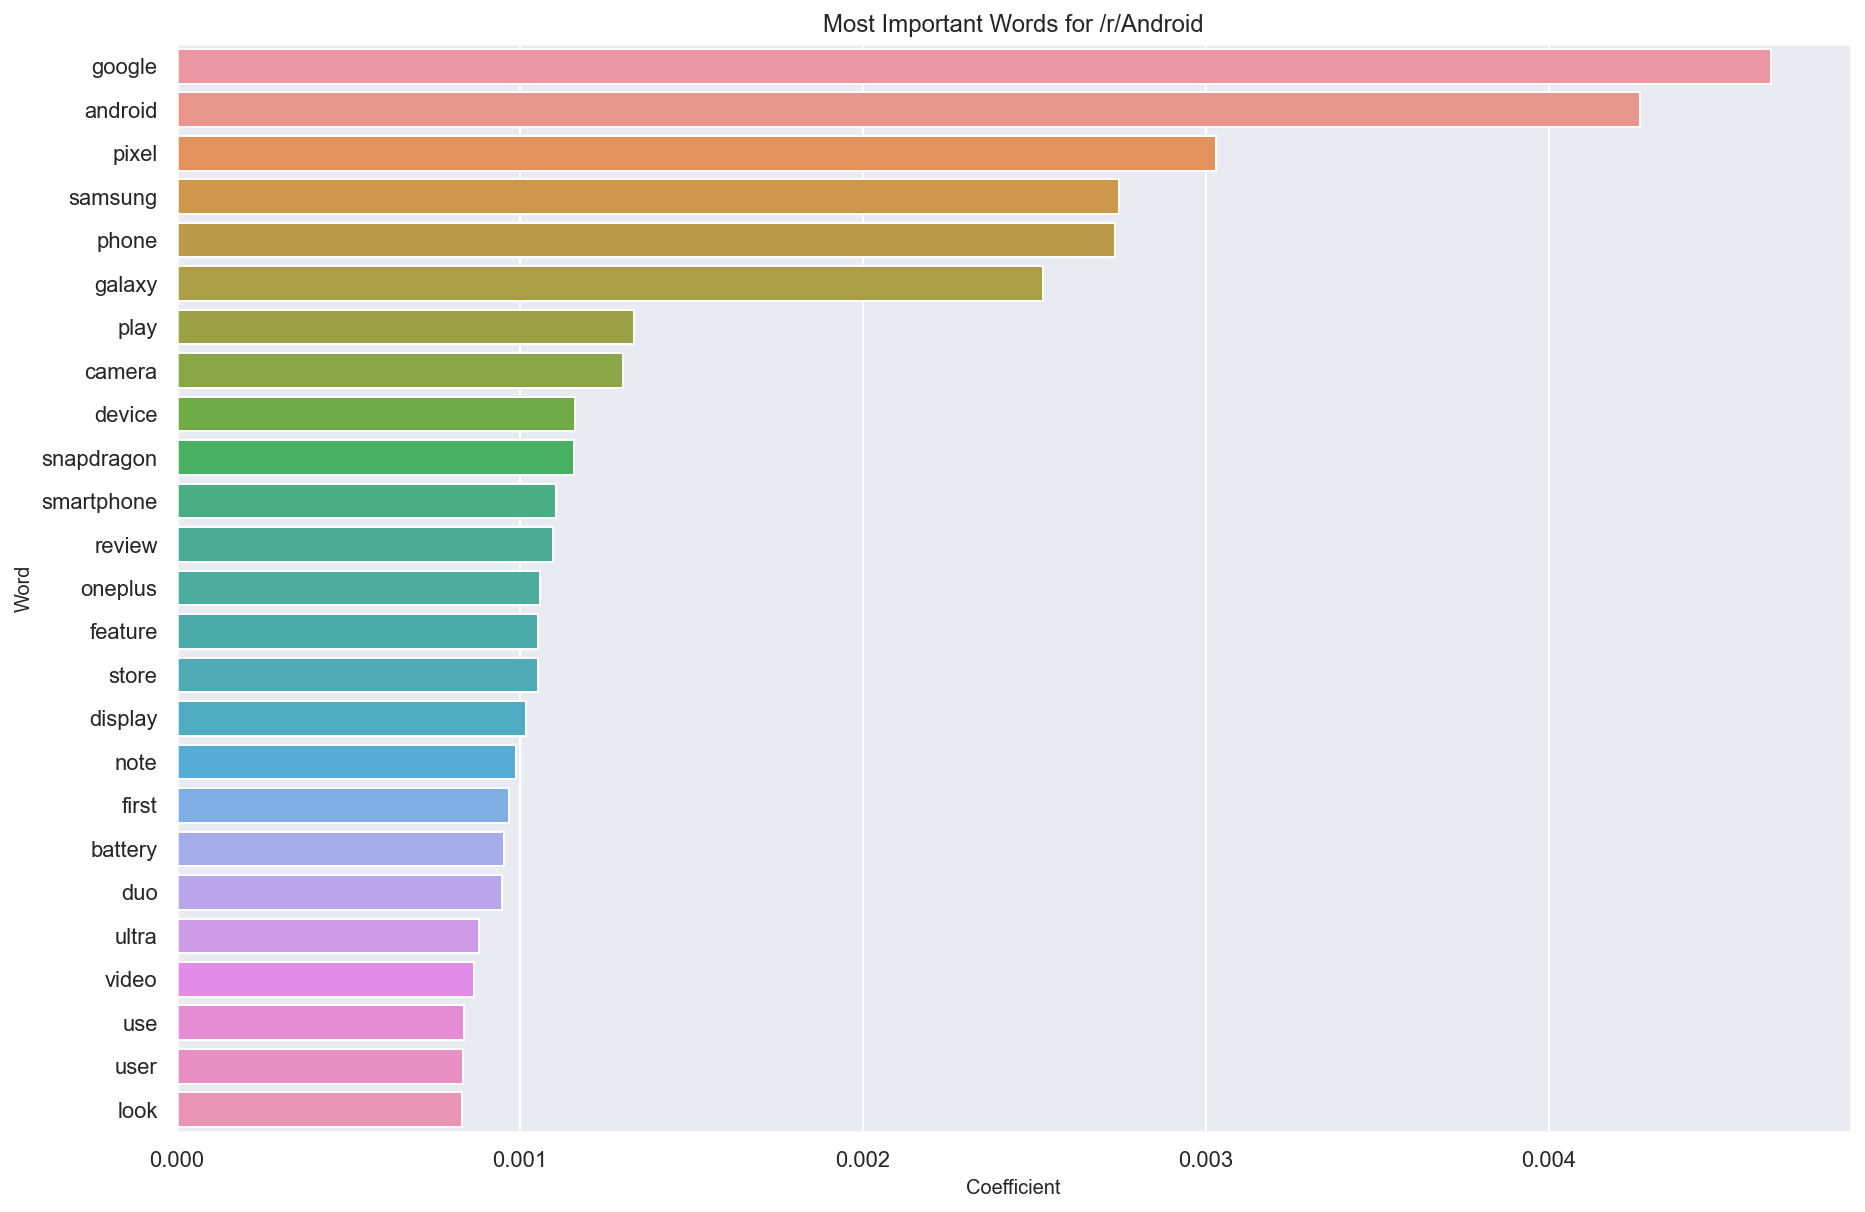

In [102]:
#plot barplot of top 25 most important words for android subreddit
plot_important_words(android_salient_top_25, 'Most Important Words for /r/Android')

The top 25 important words for the Android subreddit are also quite similar to Android's bar charts as plotted above (under the section of [After removing duplicated words](#After-removing-duplicated-words)). Similarly, some new words, such as 'snapdragon', 'duo', and 'store', were being prioritised by the model. This can be explained by (1) the usage of the Snapdragon conductor for Android systems, (2) the existence and moderate popularity of Google Duo app in Android smartphones for videos calls and (3) the existence of the google play app store for Android phones and the possible implementation of third-party app stores in Android OS. 

It seems like words related to product news and updates are prioritised by the model for the Android subreddit.

It seems like the words being ranked as most important by the model for both subreddits did not include many emotionally-charged words, which shows different results when compared to the top 25 words plotted right after CountVectorization (under the section of [After removing duplicated words](#After-removing-duplicated-words)). 
However, this phenomenon does explain why our sentiment analysis done earlier on (under the section of [Sentiment Analysis](#Sentiment-Analysis)) leaned more towards neutral for both subreddits.

In addition, many words highlighted in both subreddits are product-related, such as Macbook, iPhone, App Store for the Apple subreddit, and Galaxy, Pixel, camera, battery, google play store for the Android subreddit. At the same time, words that are feature-related such as battery, store, camera and video (app store for Apple and google play store for Android) are also highly ranked in both subreddits and prioritised by the model. 
This highly means that discussions of the products are extremely prevalent in both subreddits, and can provide us with insights on the pain points of our target consumers.

## Conclusion and Recommendations

### Takeaways
After the analysis of our text data from both subreddits, I have came up with the following takeaways for the entire project:
1. With numerous product-related and feature-related words highlighted and highly ranked in both subreddits, the pain points of users are usually present and can be found in these subreddits.

2. Reviews of Android products are popular in the Android subreddit, which usually come in the form of videos, and news articles.

3. As evident by our sentiment analysis, the sentiments of the posts are usually more neutral, with lesser emotionally-charged words. However, it's still very possible that videos or news articles linked in the subreddit posts can include emotionally-charged words that are not included in our analysis.

4. The Apple service and support stores do receive significant complaints online, which means that the in-store service experience, and after-sales support experience are both very important for both Apple and Android users.

5. With 1.8 million users and 2.3 million users subscribed to the Apple and Android subreddits respectively, it seems that online platforms that allow users to either share their views on products or ask product-related questions are very popular among these Apple and Android product users.



### Recommendations
To improve LG's market share in the U.S. smartphone industry, the following recommendations can be considered:
1. Invest and engage in more R&D, so that LG products/smartphones can solve the painpoints of customers with regards to the usage of smartphones. 

2. Slightly tweak the direction of LG's marketing campaigns, since the direction of most LG commercials seem to be gearing more towards advertising how their new technology can help 'enrich' their lives<sup>[[5]](https://www.marketingweek.com/lg-unveils-biggest-ever-ad-campaign/)</sup> as opposed to solving their current problems. Hence, the new direction of their new marketing campaigns should be geared towards how their smartphones helps to solve their target consumers' painpoints.

3. Engage in influencer marketing, since reviews from influencers are very popular among both subreddit users, who are the target consumers of LG. The engagement of key opinions leaders (such as very highly-followed reviewers from YouTube and reviews sites) can definitely help to gain some traction and hype for their new product releases.

4. Improve and maintain good quality in-store and support experience, since in-store and support experience seems to be a gripe of users from both Android and Apple.

5. Expand the LG forum page to not only include US and Canada regions<sup>[[6]](https://lgcommunity.us.com/)</sup>, but also worldwide since online platforms that allow product-related discussions are very popular among LG's target market, and worldwide discussions of LG products will help to facilitate further discussions on these forums.


### Conclusion

After comparing the performance of all models, we have decided to choose a TfidfVectorized Multinomial Naive Bayes (TF-MNB) model for our subreddit post classifer due to its high accuracy rate (together with its high recall, specificity rates and eventually with its high RUC-AOC score). Through exploratory data analysis and the study of our most important words as generated by our chosen model TF-MNB, we have found out that the highly popular words from each subreddit are usually product-related or feature-related. However, initial exploratory data analysis had some emotionally-driven words being ranked highly while analysis of important words after modelling showed otherwise. This definitely translates to more neutral sentiments for both subreddits, which was what we have gathered after polarity sentiment analysis of both subreddits. With the usage of this classifer as well as the knowledge of important and prioritised words for each subreddit, LG can make use of these insights to further improve their products, service and marketing efforts to eventually improve their smartphone market share in the United States.

Moving forward, the model should be fed with more new text data from both subreddits repeatedly, so that the model can continuously calibrate and improve their accuracy overtime. Besides that, LG should also choose to invest in more market research to learn more about their target consumers outside of reddit, since subreddit users are only a proportion of LG's target consumers in the United States. In addition, videos or news articles linked in the subreddit posts can include valuable information regarding their target consumers and should also be studied in the future.

## References

https://foundationinc.co/lab/reddit-statistics/#:~:text=Reddit%20is%20the%20Sixth%20Most,website%20in%20the%20United%20States.<br>
https://marketrealist.com/2019/08/googles-android-will-remain-top-long-time/<br>
https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/<br>
https://marketrealist.com/2019/08/googles-android-will-remain-top-long-time/<br>
https://www.marketingweek.com/lg-unveils-biggest-ever-ad-campaign/<br>
https://lgcommunity.us.com/

